<a href="https://www.kaggle.com/code/abhijitbhandari/kalimati-data-analysis?scriptVersionId=146104887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
import re
import matplotlib.patches as patches
import matplotlib
!pip install inflect
import inflect

In [2]:
data = pd.read_csv("/kaggle/input/kalimati-tarkari-dataset/Kalimati_Tarkari_Dataset.csv")
data.head()

/tmp/ipykernel_20/1739872940.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/kaggle/input/kalimati-tarkari-dataset/Kalimati_Tarkari_Dataset.csv")


,Commodity,Date,Unit,Minimum,Maximum,Average
0,Tomato Big(Nepali),6/16/2013,Kg,35,40,37.5
1,Tomato Small(Local),6/16/2013,Kg,26,32,29.0
2,Potato Red,6/16/2013,Kg,20,21,20.5
3,Potato White,6/16/2013,Kg,15,16,15.5
4,Onion Dry (Indian),6/16/2013,Kg,28,30,29.0


In [3]:
pattern = r"^Rs\s+"
data["Minimum"] = pd.to_numeric(data["Minimum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(pattern,"",str(x))))
data["Maximum"] = pd.to_numeric(data["Maximum"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "",str(x))))
data["Average"] = pd.to_numeric(data["Average"].apply(lambda x: x if not str(x).startswith("Rs") else re.sub(r"^Rs\s+", "", str(x))))

<Axes: >

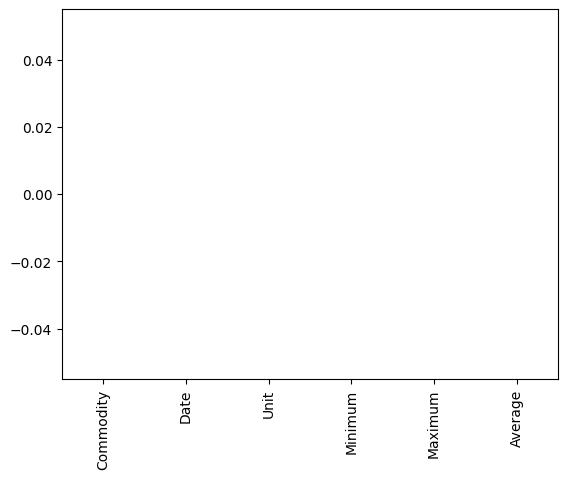

In [4]:
data.isnull().sum().plot(kind = "bar")

In [5]:
data.describe()

,Minimum,Maximum,Average
count,280862.000000,280862.000000,280862.000000
mean,96.016171,107.272016,101.770244
std,92.009056,101.406522,96.748652
min,0.000000,0.000000,0.000000
25%,40.000000,50.000000,45.000000
50%,65.000000,70.000000,67.500000
75%,110.000000,120.000000,116.670000
max,2800.000000,3000.000000,2900.000000


## Data Wrangling

In [6]:
data.dtypes

Commodity     object
Date          object
Unit          object
Minimum      float64
Maximum      float64
Average      float64
dtype: object

In [7]:
def parse_date(date_str):
    try:
        parsed_date = parser.parse(date_str)
        standardized_date = parsed_date.strftime("%Y-%m-%d")
        return standardized_date
    except Exception as e:
        return None
data["Date"] = data["Date"].apply(parse_date)
data["Date"] = pd.to_datetime(data["Date"])

In [8]:
data["Month"] = data["Date"].dt.strftime("%B")
data["Year"] = data["Date"].dt.year
data["Day"] = data["Date"].dt.strftime("%A")

In [9]:
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day
0,Tomato Big(Nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday
1,Tomato Small(Local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday
2,Potato Red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday
3,Potato White,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday
4,Onion Dry (Indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday


In [10]:
data.isnull().sum()

Commodity    0
Date         0
Unit         0
Minimum      0
Maximum      0
Average      0
Month        0
Year         0
Day          0
dtype: int64

In [11]:
data["Commodity"] = data["Commodity"].str.lower()

In [12]:
print("Total Number of Unique Commodities Sold at Kalimati: ",len(data["Commodity"].unique()))

Total Number of Unique Commodities Sold at Kalimati:  136


In [13]:
data["Commodity"].nunique()

136

In [14]:
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday


### Data  Available For Different Years

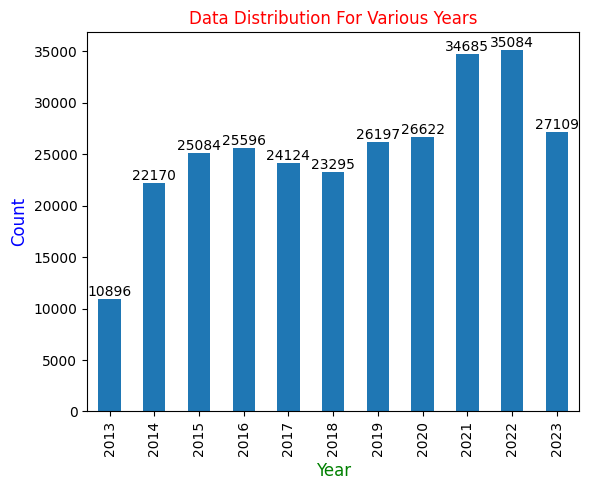

In [15]:
data_magnitude = data.groupby(["Year"])["Year"].count()
plt.figure(figsize = (6,5))
ax = data_magnitude.plot(kind = "bar")



for i,v in enumerate(data_magnitude):
    ax.text(i, v+0.2, str(v), ha = "center", va = "bottom")
    
plt.xlabel("Year", color = "Green", fontsize = 12)
plt.ylabel("Count", color = "Blue", fontsize = 12)
plt.title("Data Distribution For Various Years", color = "Red")
plt.tight_layout()
    
plt.savefig("./1.Data_Distribution.png")
plt.show()
    

**We can assume that a reliable data recording mechanism was established after 2014. The highest number of entries was recorded in the year 2022. However, 2023 is still in progress and may exceed the data count for 2022.**

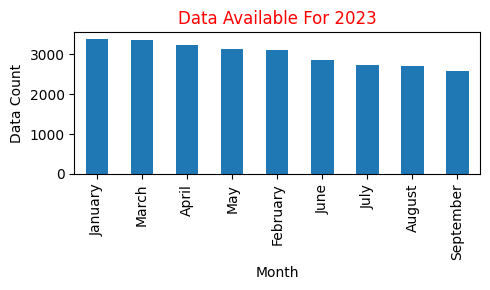

In [16]:
plt.figure(figsize = (5,3))
data[data["Year"]==2023]["Month"].value_counts().plot(kind = "bar")
plt.xlabel("Month")
plt.ylabel("Data Count")
plt.title("Data Available For 2023", color = "Red")
plt.tight_layout()

plt.savefig("./2.Data_Distribution_For_2023.png")
plt.show()
    

### Changes in Commodities Sold Based on Year

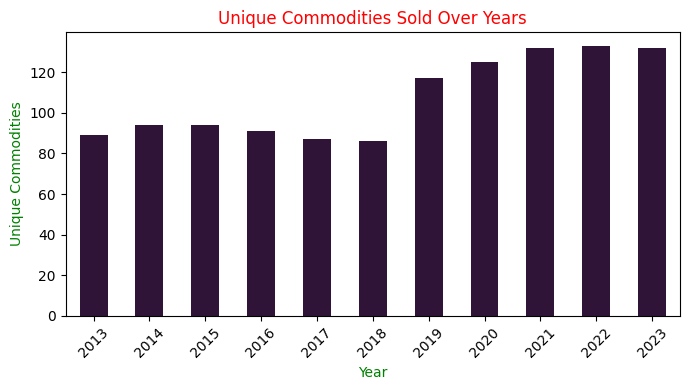

In [17]:
plt.figure(figsize = (7,4))
data.groupby("Year")["Commodity"].nunique().plot(kind = "bar", cmap = "twilight_shifted")
plt.title("Unique Commodities Sold Over Years", color = "Red")
plt.xlabel("Year", color = "green")
plt.ylabel("Unique Commodities", color = "green")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.savefig("./3.unique_commodities.png")

**It's clear that there was a noticeable uptick in the variety of commodities sold after the year 2019. This suggests that Kalimati (or the relevant marketplace) began offering a more extensive range of fruits and vegetables. Furthermore, this expansion indicates that Nepal either began producing or importing new types of fruits and vegetables post-2019.**

#### What are the commodities that started getting included after 2019??

In [18]:
data_before_2019 = data[data["Year"]<2019]
data_before_2019.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday


In [19]:
data_after_2019 = data[data["Year"]>=2019]
data_after_2019.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day
131165,tomato big(nepali),2019-01-01,Kg,45.0,50.0,47.5,January,2019,Tuesday
131166,tomato small(local),2019-01-01,Kg,20.0,25.0,22.5,January,2019,Tuesday
131167,potato red,2019-01-01,Kg,30.0,34.0,32.0,January,2019,Tuesday
131168,potato white,2019-01-01,Kg,20.0,25.0,22.5,January,2019,Tuesday
131169,onion dry (indian),2019-01-01,Kg,26.0,28.0,27.0,January,2019,Tuesday


In [20]:
commodities_before_2019 = set(data_before_2019["Commodity"].str.lower())
commodities_after_2019 = set(data_after_2019["Commodity"].str.lower())

In [21]:
unique_commodities_after_2019 = commodities_after_2019 - commodities_before_2019
unique_commodities_before_2019 = commodities_before_2019 - commodities_after_2019

In [22]:
unique_commodities_before_2019

{'maize'}

<Figure size 800x800 with 0 Axes>

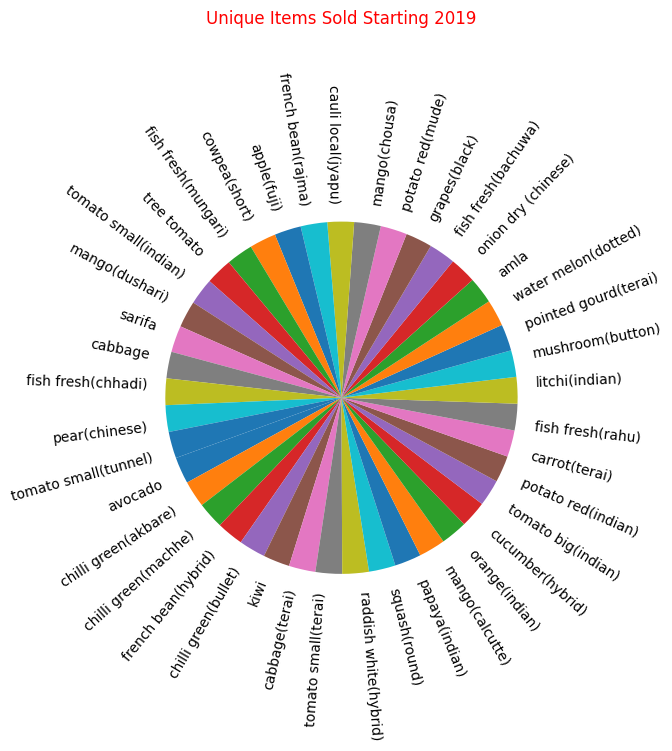

In [23]:
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([1]*len(unique_commodities_after_2019),
       labels = unique_commodities_after_2019,
       startangle = 200,
       labeldistance= 1.1,
       rotatelabels=True)
ax.axis("equal")
ax.set_title("Unique Items Sold Starting 2019", y = 1.45, color = "Red")
plt.savefig("./4.unique_commodities_after2019.png", bbox_inches = "tight")
plt.show()


<Figure size 800x800 with 0 Axes>

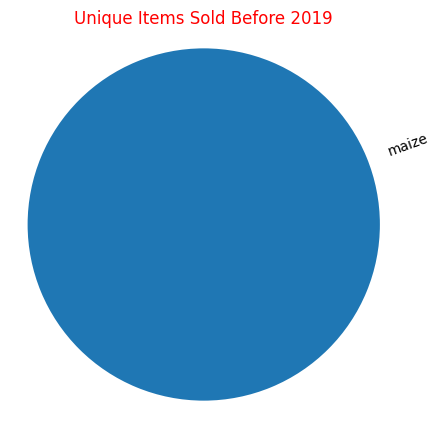

In [24]:
plt.figure(figsize = (8,8))
fig, ax = plt.subplots(figsize = (5,5))
ax.pie([1]*len(unique_commodities_before_2019),
       labels = unique_commodities_before_2019,
       startangle = 200,
       labeldistance= 1.1,
       rotatelabels=True)
ax.axis("equal")
ax.set_title("Unique Items Sold Before 2019", y = 1., color = "Red")
plt.savefig("./5.unique_commodities_before2019.png", bbox_inches = "tight")
plt.show()


#### Any Unique Commodity in 2023?

In [25]:
data_2023 = data[data["Year"]==2023]
data_before_2023 = data[data["Year"]<2023]
commodities_2023 = set(data_2023["Commodity"].str.lower())
commodities_before_2023 = set(data_before_2023["Commodity"].str.lower())

In [26]:
unique_items_2023 = commodities_2023 - commodities_before_2023
unique_items_2023

set()

**Nothing New Has Been Added in 2023**

## Items With Highest Price Fluctuation - Yearwise

In [27]:
items_avg_years = data.groupby(["Year", "Commodity"])["Average"].mean().unstack(level = 0).fillna(value = 0)

#### Price Fluctuation For Commodities With Minimum of 5 Years of Data With Atleast One Missing

In [28]:
def count_zeros(row):
    return (row==0).sum()
zero_count = items_avg_years.apply(count_zeros, axis = 1)

In [29]:
filtered_items_avg_zero_lesseq5 = items_avg_years[(zero_count<=5)&(zero_count<=3)]

In [30]:
filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100

/tmp/ipykernel_20/3349868516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100


In [31]:
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

In [32]:
top_10_variations.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Coefficient of Variation
Commodity,,,,,,,,,,,,
mandarin,55.000000,55.000000,45.500000,65.944444,0.000000,0.000000,0.000000,85.000000,312.232143,225.557669,250.549288,110.922968
sugarcane,60.284091,51.839623,47.204301,55.000000,0.000000,0.000000,0.000000,67.162162,73.800000,95.663673,88.109054,70.774650
bauhania flower,0.000000,84.574468,95.350000,80.071429,119.950000,99.347826,98.300000,0.000000,210.669643,201.571429,217.141077,68.385600
fish fresh,223.365385,218.938907,230.721429,233.983516,233.640227,249.586777,260.155172,247.500000,0.000000,0.000000,0.000000,64.585088
clive green,60.894737,76.928571,66.300912,128.677686,73.342105,77.623967,0.000000,0.000000,167.800481,115.726089,85.447321,64.147306


In [33]:
# z_order = top_10_variations.index

In [34]:
# plt.figure(figsize = (10,5))
# count = len(z_order)
# pos = 0
# for commodity in top_10_variations.index:
#     plt.fill_between([int(x) for x in top_10_variations.columns[:-1]],
#              top_10_variations.loc[commodity][:-1], label = commodity, alpha = 0.7, zorder = count - pos)
#     pos+=1
# plt.xlabel("Year", fontsize = 12)
# plt.ylabel("Price", fontsize = 12)
# plt.title("Top 10 Commodities with Highest Price Fluctuation (Min. 5 Years of Sales Atleast One Missing)", fontsize = 12)
# plt.legend(loc = "upper left")
# plt.grid(True)
# plt.savefig("./6.highest_price_fluc_5yrs1miss.png", bbox_inches = "tight")
# plt.show()





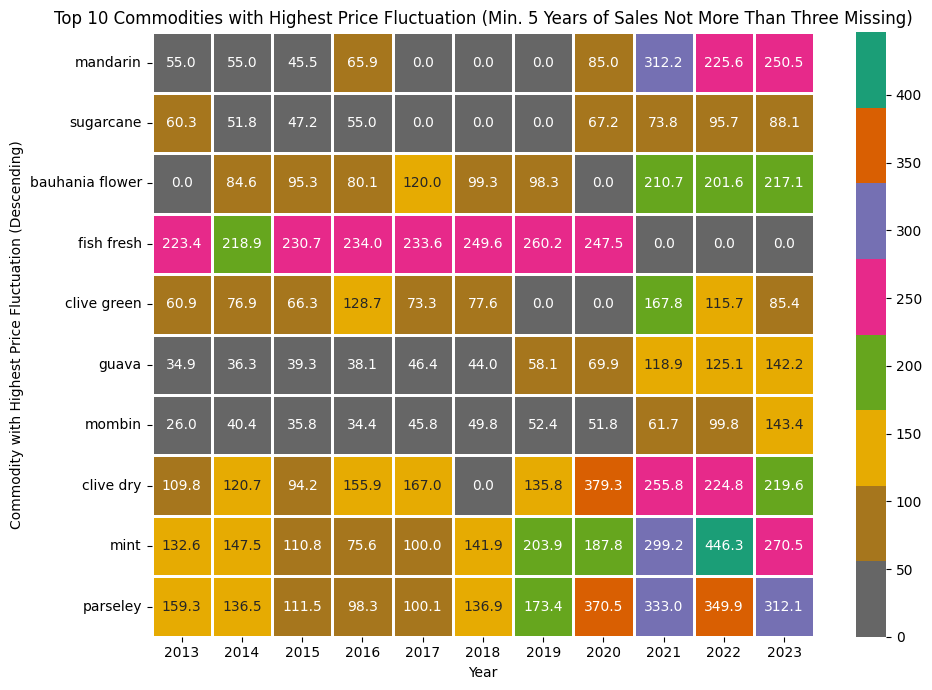

In [35]:
plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Descending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities with Highest Price Fluctuation (Min. 5 Years of Sales Not More Than Three Missing)", fontsize = 12)
plt.tight_layout()

Category: **Range (3 <= Zero_Count <= 5)**

1. Prices in this category have been consistently rising since 2019.

2. Among these commodities, Mandarin stands out with the highest price fluctuation. Its price remained relatively stable until 2020 but saw a sharp increase after 2020, with the most significant rise occurring in 2021, around the end of the Covid-19 pandemic. Mandarins have historical roots in ancient China.

3. Sugarcane exhibits a similar level of price volatility, but it disappeared from the Kalimati Market between 2017 and 2019, likely due to the impact of the COVID-19 pandemic during that period.

4. Bauhinia Flower experienced a sudden price surge after 2020, while fresh fish disappeared from the market after that year.

5. Clove Green, Clove Dry, and Mint prices have been consistently decreasing. Mint, in particular, which had shown a steady price increase, experienced a sharp decline in 2023. The price of Mint is the highest in this category.

6. Guava is getting costlier each year.

7. Parseley saw a significant price hike in 2020, followed by a period of relative price stability.

In summary, most items in this category saw a notable increase in prices after 2020.

#### Price Fluctuation For Commodities With More Than 5 Years Data Inavailability (Limited Data)

In [36]:
filtered_items_avg_zero_gr5 = items_avg_years[zero_count>5]
filtered_items_avg_zero_gr5.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Commodity,,,,,,,,,,,
amla,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,86.666667,78.779231,94.676429
apple(fuji),0.0,0.0,0.0,0.0,0.0,0.0,306.379310,271.601124,265.198864,268.202163,299.717286
avocado,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,281.746032,387.236022,460.439777
cabbage,0.0,0.0,0.0,0.0,0.0,0.0,49.680000,30.734375,22.265873,24.769455,18.160549
cabbage(terai),0.0,0.0,0.0,0.0,0.0,0.0,39.565217,30.026087,19.439516,32.294261,18.580215


In [37]:
filtered_items_avg_zero_gr5["Coefficient of Variation"] = (filtered_items_avg_zero_gr5.std(axis = 1)/filtered_items_avg_zero_gr5.mean(axis = 1))*100
filtered_items_avg_zero_gr5.head()

/tmp/ipykernel_20/1575526639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_gr5["Coefficient of Variation"] = (filtered_items_avg_zero_gr5.std(axis = 1)/filtered_items_avg_zero_gr5.mean(axis = 1))*100


Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Coefficient of Variation
Commodity,,,,,,,,,,,,
amla,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,86.666667,78.779231,94.676429,171.928191
apple(fuji),0.0,0.0,0.0,0.0,0.0,0.0,306.379310,271.601124,265.198864,268.202163,299.717286,115.284305
avocado,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,281.746032,387.236022,460.439777,175.682347
cabbage,0.0,0.0,0.0,0.0,0.0,0.0,49.680000,30.734375,22.265873,24.769455,18.160549,129.185297
cabbage(terai),0.0,0.0,0.0,0.0,0.0,0.0,39.565217,30.026087,19.439516,32.294261,18.580215,123.157432


In [38]:
sorted_items = filtered_items_avg_zero_gr5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

In [39]:
# plt.figure(figsize = (10,5))
# for commodity in top_10_variations.index:
#     plt.plot(top_10_variations.columns[:-1],
#              top_10_variations.loc[commodity][:-1], label = commodity)
# plt.xlabel("Year", fontsize = 12)
# plt.ylabel("Price", fontsize = 12)
# plt.title("Top 10 Commodities with Highest Price Fluctuation (Limited Data)", fontsize = 12)
# plt.legend()
# plt.grid(True)
# plt.savefig("./7.highest_price_fluc_5yrsmore.png", bbox_inches = "tight")
# plt.show()




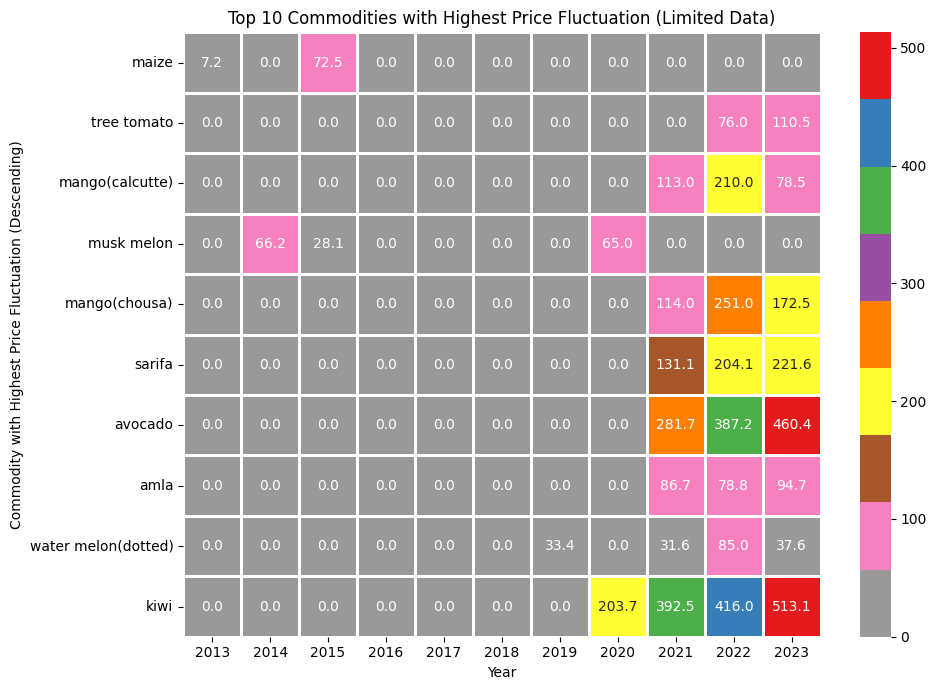

In [40]:
plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Set1_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Descending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities with Highest Price Fluctuation (Limited Data)", fontsize = 12)
plt.tight_layout()

1. These products fall into the category of premium items due to their recent introduction to the market.
2. Prices for these products have consistently remained high, with the majority of them entering the market in 2020.
3. The timing of the introduction of premium products shortly after the Covid-19 pandemic raises questions about whether they were locally manufactured or imported.
4. Among these premium items, kiwi commands the highest price, while maize experiences significant price fluctuations in the Kalimati market.
5. Avocado is not coming down. It's price is constantly going up.
6. The fluctuation in maize prices can be attributed to its sporadic appearance and disappearance in the market after extended periods of absence.

#### Price Fluctuation of Commodities That Remained Always Available

In [41]:
filtered_items_avg_zero_no = items_avg_years[zero_count==0]
filtered_items_avg_zero_no.head()

Year,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Commodity,,,,,,,,,,,
apple(jholey),111.153846,130.827974,107.128571,107.032967,104.277620,100.592287,133.926554,158.408360,193.108108,193.862897,224.938624
arum,35.875000,41.642857,33.234277,37.266234,43.812721,47.409794,50.269231,51.094787,51.216617,48.558374,54.548168
asparagus,195.849057,246.984127,291.344221,315.368098,357.978723,450.000000,295.000000,348.656716,886.406250,354.216902,345.165338
bakula,77.824074,45.961268,43.393103,62.675000,64.413043,79.435484,75.342466,80.984252,100.292398,79.539665,68.841803
bamboo shoot,73.885350,114.764610,66.826648,120.364011,124.830028,83.674033,114.285714,105.056338,88.581267,107.171472,99.095299


In [42]:
filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100

/tmp/ipykernel_20/2462266270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100


In [43]:
sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

In [44]:
# plt.figure(figsize = (10,5))
# for commodity in top_10_variations.index:
#     plt.plot(top_10_variations.columns[:-1],
#              top_10_variations.loc[commodity][:-1], label = commodity)
# plt.xlabel("Year", fontsize = 12)
# plt.ylabel("Price", fontsize = 12)
# plt.title("Top 10 Commodities With Highest Price Fluctuation Consistently Available in the Market", fontsize = 12)
# plt.legend()
# plt.grid(True)
# plt.savefig("./8.highest_price_fluc_constavail.png", bbox_inches = "tight")
# plt.show()






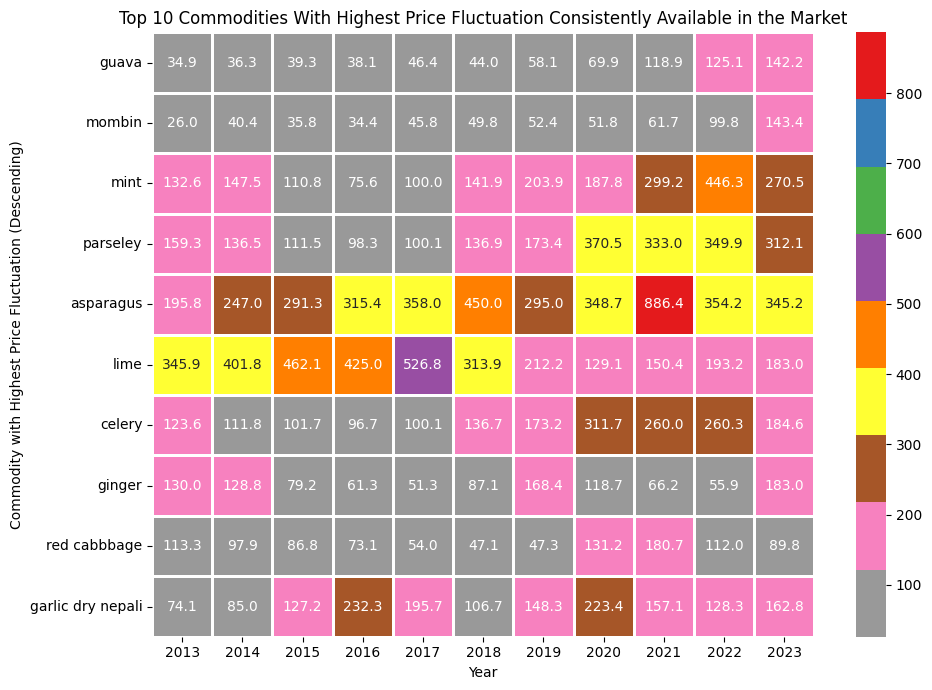

In [45]:
plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Set1_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Descending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities With Highest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()

1. Prices of consistently available commodities have seen a significant increase.
2. Guava experienced a sharp price spike after 2020.
3. Both mint and parsley became nearly twice as expensive after 2020.
4. Lime prices have been decreasing since 2017, possibly due to local production growth or reduced consumer demand.
5. Ginger prices took a considerable leap in 2023, rising from 55.9 Rs per kilo to 183 Rs per kilo.
6. Despite their consistent availability, asparagus remains a premium product in the market.

## Items With Lowest Price Fluctuation - Yearwise

#### Price Fluctuation of Commodities With Minimum of 5 Years of Data But Atleast With One Missing Data

/tmp/ipykernel_20/154681858.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100


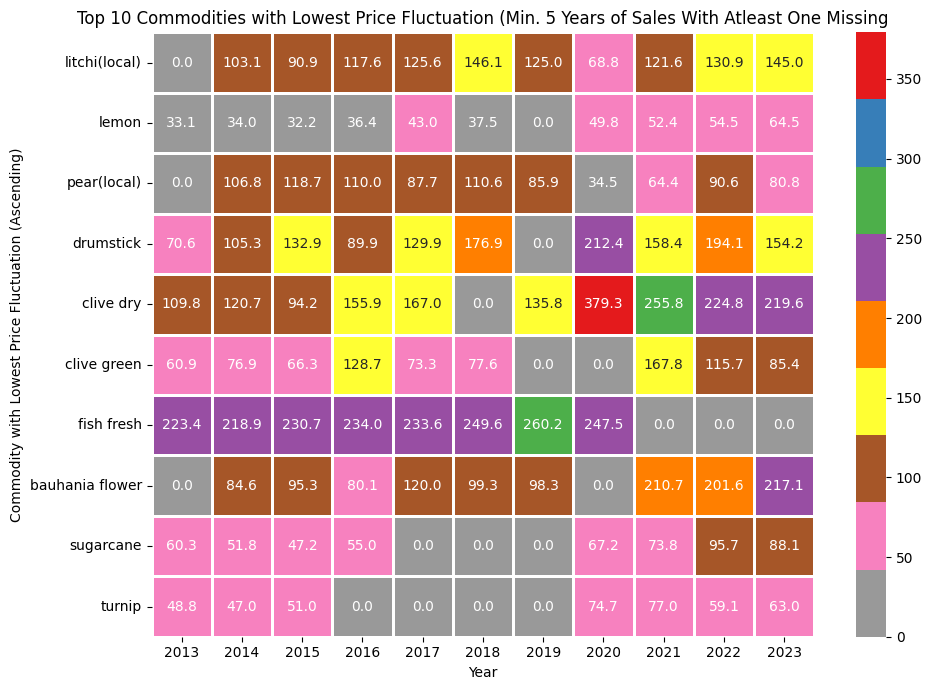

In [46]:
items_avg_years = data.groupby(["Year", "Commodity"])["Average"].mean().unstack(level = 0).fillna(value = 0)

def count_zeros(row):
    return (row==0).sum()
zero_count = items_avg_years.apply(count_zeros, axis = 1)

filtered_items_avg_zero_lesseq5 = items_avg_years[(zero_count<=5)&(zero_count>0)]

filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)

plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Set1_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Lowest Price Fluctuation (Ascending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities with Lowest Price Fluctuation (Min. 5 Years of Sales With Atleast One Missing", fontsize = 12)
plt.tight_layout()




1. These products can be assumed to be locally produced in the country because their prices show relatively low fluctuations compared to other analyzed products and most of the products in this category has a price range between Rs 50-100.

2. In 2020, during the peak of the Covid-19 pandemic, the prices of Litchi, Lemon, and Pear (Local) experienced a sharp decline. This could be attributed to the lack of a market during that period, leading sellers to focus on clearing their stock rather than maximizing profit.

3. Clove Dry saw a significant price increase in 2020, almost doubling from previous years, and is now gradually decreasing. This suggests a potential relationship between the price of Clove Dry and the Covid-19 pandemic.

4. The price of Bauhinia Flower doubled after the Covid-19 pandemic, despite the Kalimati Market not selling any in 2020. This price increase warrants further investigation.

5. Kalimati Market appears to have stopped selling fresh fish from 2021 and began re-selling Sugarcane and Turnip after 2020. However, it's essential to exercise caution when drawing conclusions solely from zero figures, as there may be underlying factors at play.

#### Price Fluctuation For Commodities With More Than 5 Years Data Inavailability (Limited Data)

/tmp/ipykernel_20/2890502534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_gr5["Coefficient of Variation"] = (filtered_items_avg_zero_gr5.std(axis = 1)/filtered_items_avg_zero_gr5.mean(axis = 1))*100


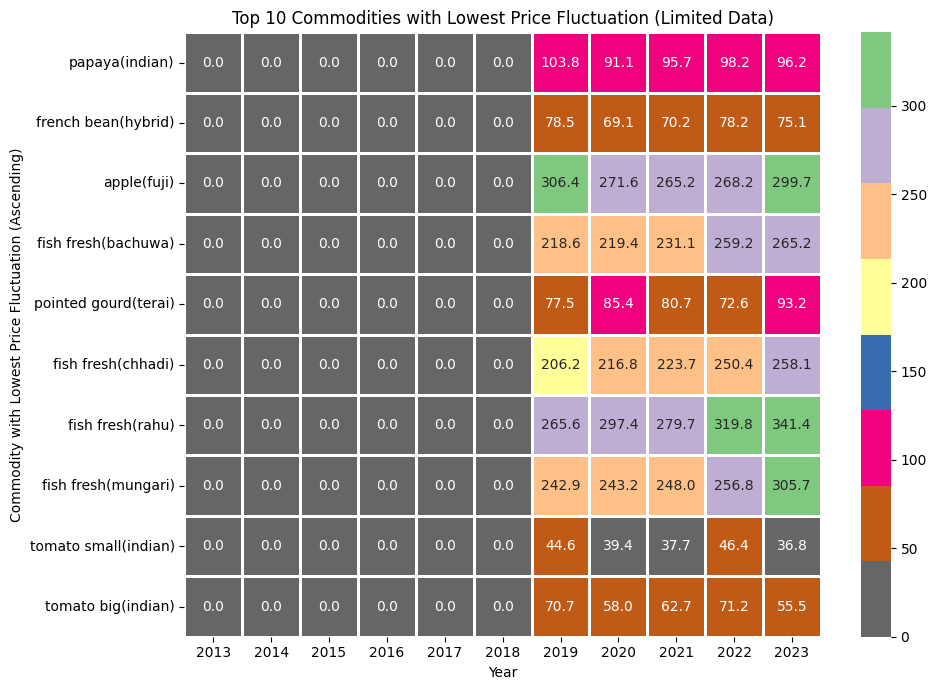

In [47]:
filtered_items_avg_zero_gr5 = items_avg_years[zero_count>5]

filtered_items_avg_zero_gr5["Coefficient of Variation"] = (filtered_items_avg_zero_gr5.std(axis = 1)/filtered_items_avg_zero_gr5.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_gr5.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)

plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Accent_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Lowest Price Fluctuation (Ascending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities with Lowest Price Fluctuation (Limited Data)", fontsize = 12)
plt.tight_layout()



1. This category comprises products that are relatively new additions to the Kalimati Market, introduced in the year of the Covid-19 pandemic in 2019.

2. Upon closer examination, these products appear to be generally imported from foreign countries, indicating a shift in the market dynamics.

3. The Terai region of Nepal, known for its agricultural production, saw the late introduction of pointed gourd to the Kalimati Market, occurring only in 2019.

4. Among the fish varieties, the price of Fish Fresh (Mungari) exhibits notable inconsistency, with a significant price increase of nearly 50 Rs per kilo observed in 2023.

#### Price Fluctuation of Commodities That Remained Always Available

/tmp/ipykernel_20/2005460596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100


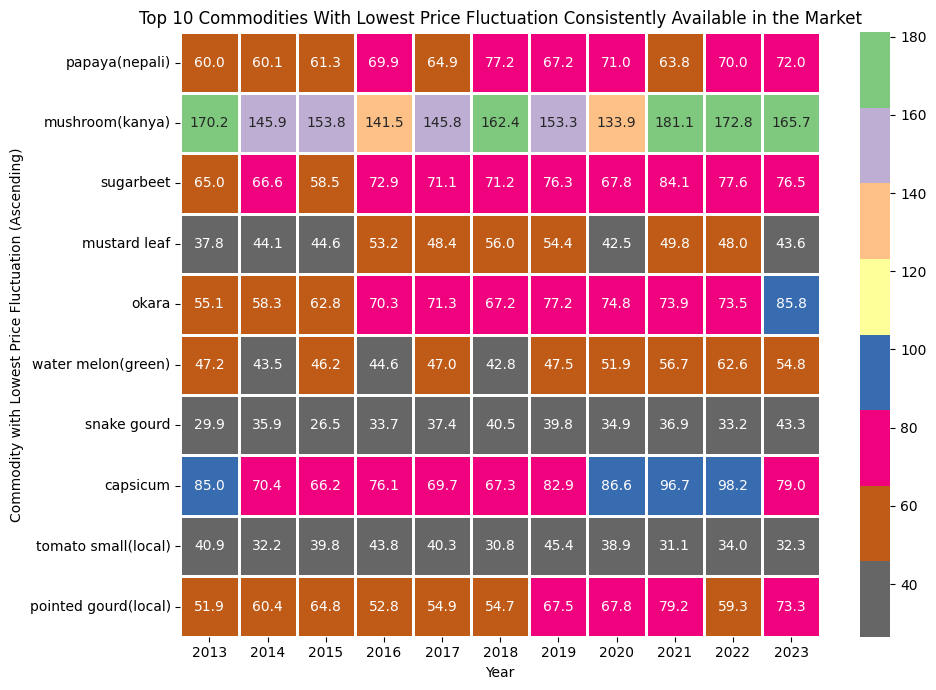

In [48]:
filtered_items_avg_zero_no = items_avg_years[zero_count==0]

filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)


plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Accent_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Lowest Price Fluctuation (Ascending)")
plt.xlabel("Year")
plt.title("Top 10 Commodities With Lowest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()


1. This category encompasses commodities that have been consistently available in the market.

2. Notably, even among consistently available items, some products are changing their price classes. For example, Papaya (Nepali) transitioned to the next price class, which includes items in the range of 60 - 80.

3. In 2020, Mushroom (Kanye), which had maintained a price range of 120-140 for several years, made a significant leap into the price range of 160 - 180.

4. Snake Gourd's price has shown minimal change over time, suggesting it may not be a popular choice among Nepalese families or that its production remains consistent.

5. Tomato Small (Local) follows a similar pattern to Snake Gourd, with relatively stable prices over the years.

6. Okara, on the other hand, has shifted between three different price classes. In 2023, its price jumped to the category of 80 - 100, whereas it primarily ranged between 60 - 80 from 2016 to 2022.

## Seasonal Analysis

In our calculations, we have opted not to utilize the mean as the primary measure but have instead chosen the median. This choice stems from our analysis of seasonal prices spanning a 9-year period. Our rationale for this preference is rooted in the understanding that employing the mean as the foundational metric for calculating prices during a specific season may lead to a disproportionate influence of outliers in certain scenarios.

In [49]:
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday


Spring (March-May)
Summer (June-August)
Autumn (September-November)
Winter (December-February)

In [50]:
month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Autumn',
    'October': 'Autumn',
    'November': 'Autumn',
    'December': 'Winter'
}

data["Season"] = data["Month"].map(month_to_season)
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day,Season
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday,Summer
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday,Summer
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday,Summer
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday,Summer
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday,Summer


In [51]:
items_avg_season = data.groupby(["Season", "Commodity"])["Average"].median().unstack(level = 0).fillna(value = 0)
items_avg_season.head(10)

Season,Autumn,Spring,Summer,Winter
Commodity,,,,
amla,75.0,95.000,102.500,75.00
apple(fuji),290.0,275.000,291.665,265.00
apple(jholey),115.0,115.000,115.000,105.00
arum,42.5,46.670,47.500,45.00
asparagus,395.0,379.165,255.000,0.00
avocado,250.0,475.000,525.000,325.00
bakula,97.5,55.000,140.000,72.50
bamboo shoot,95.0,96.670,115.000,96.67
banana,75.0,95.000,85.000,75.00


### Items With Highest And Lowest Price Fluctuation Seasonal

#### Price Fluctuation For Commodities With Minimum of 5 Years of Data With Atleast One Missing

In [52]:
def count_zeros(row):
    return (row==0).sum()
zero_count = items_avg_season.apply(count_zeros, axis = 1)

In [53]:
filtered_items_avg_zero_lesseq5 = items_avg_season[(zero_count<=3)]

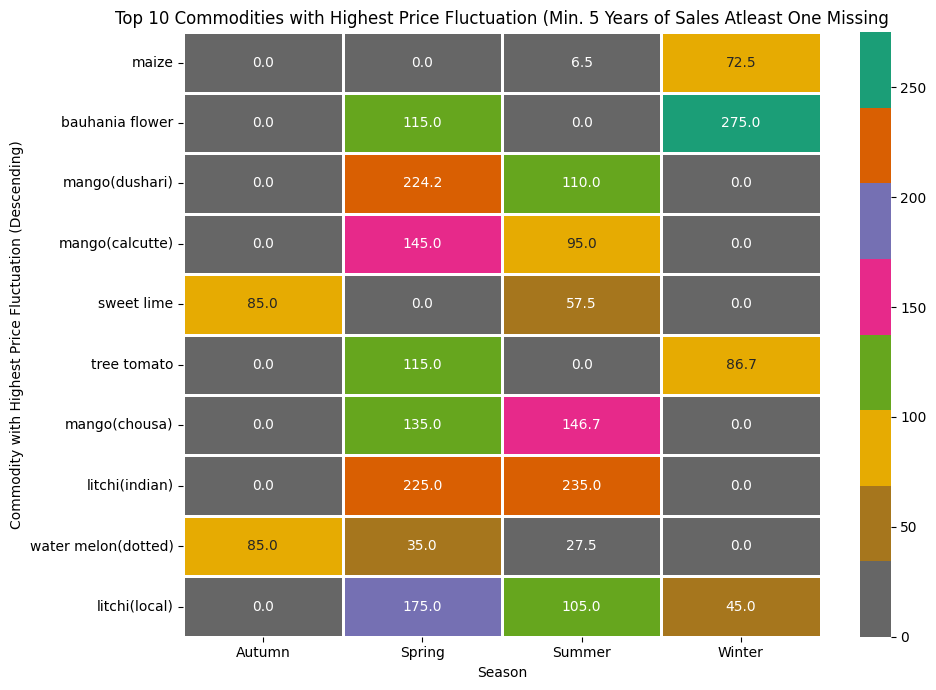

In [54]:
filtered_items_avg_zero_lesseq5["Coefficient of Variation"] = (filtered_items_avg_zero_lesseq5.std(axis = 1)/filtered_items_avg_zero_lesseq5.mean(axis = 1))*100
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Descending)")
plt.xlabel("Season")
plt.title("Top 10 Commodities with Highest Price Fluctuation (Min. 5 Years of Sales Atleast One Missing", fontsize = 12)
plt.tight_layout()

1. Maize exhibits the highest price fluctuations when analyzed seasonally, but the data appears perplexing. Maize's price is 6.5 during the summer and then sharply jumps to a range of 50 - 100 in winter. 

2. Assuming the data is accurate, it suggests that maize is harvested during the summer, and the surplus from this season is stored in cold storage facilities. Subsequently, it is brought to the market in winter at a premium price.

3. Most of the commodities listed in this category are considered summer goods, as their prices are relatively lower during the summer compared to other seasons. However, exceptions to this trend include Mango (Chousa) and Litchi (Indian).

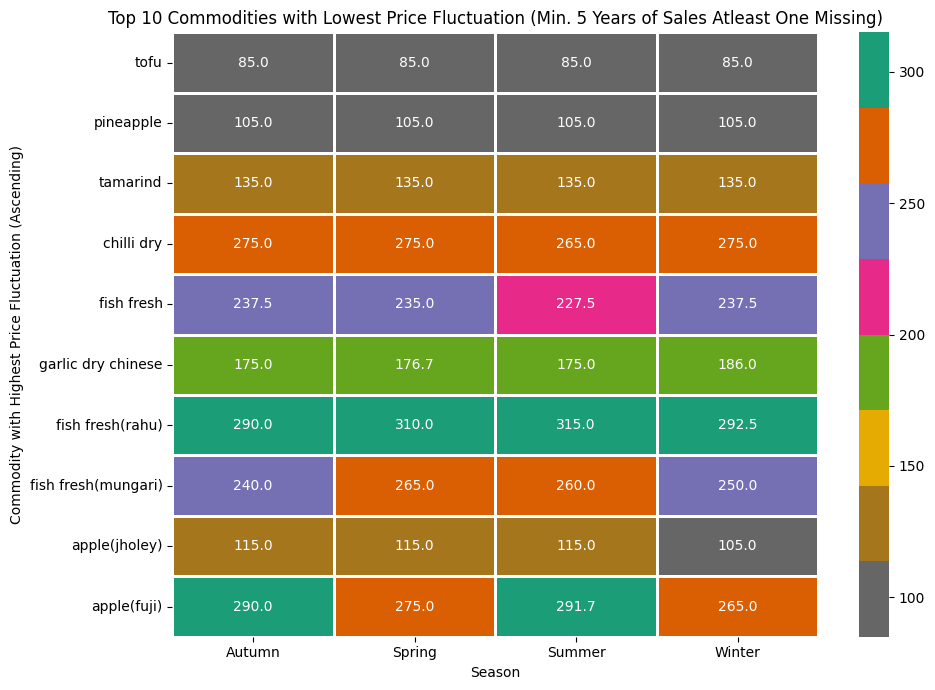

In [55]:
sorted_items = filtered_items_avg_zero_lesseq5.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)


plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Commodities with Lowest Price Fluctuation (Min. 5 Years of Sales Atleast One Missing)", fontsize = 12)
plt.tight_layout()



Certainly, let's summarize the price trends based on the provided information:

1. **Apple (Fuji):**
   - Price drops in Spring and Winter.
   - Price goes up in Autumn and Summer.
   - The price drop is not drastic.

2. **Tofu, Pineapple, and Apple (Jholey):**
   - These are the cheapest items on the list.

3. **Fish Fresh (Rahu):**
   - Prices remain pretty consistent throughout the year.
   - A slight increase of 20 - 30 Rs in Spring and Summer.
   - It's cheaper than Fish Rahu.
   - The price drops around 10 - 12 Rs in Summer.

#### Price Fluctuation For Commodities With More Than 5 Years Data Inavailability (Limited Data)

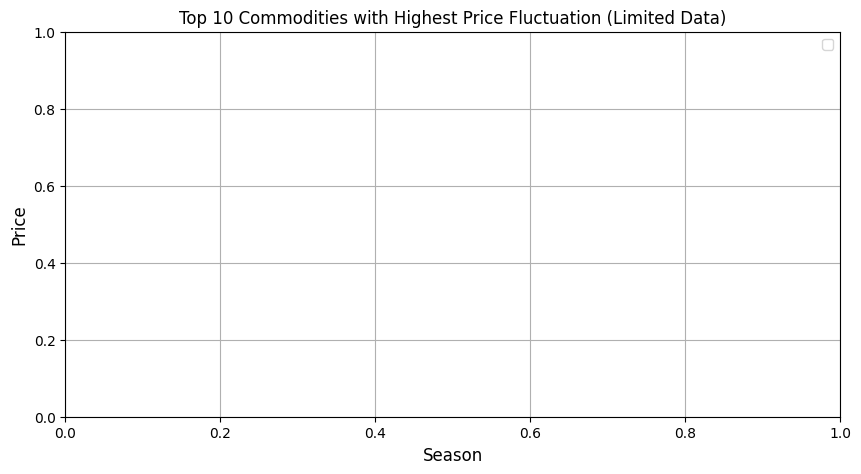

In [56]:
filtered_items_avg_zero_gr5 = items_avg_season[zero_count>5]

filtered_items_avg_zero_gr5["Coefficient of Variation"] = (filtered_items_avg_zero_gr5.std(axis = 1)/filtered_items_avg_zero_gr5.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_gr5.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)

plt.figure(figsize = (10,5))
for commodity in top_10_variations.index:
    plt.plot(top_10_variations.columns[:-1],
             top_10_variations.loc[commodity][:-1], label = commodity)
plt.xlabel("Season", fontsize = 12)
plt.ylabel("Price", fontsize = 12)
plt.title("Top 10 Commodities with Highest Price Fluctuation (Limited Data)", fontsize = 12)
plt.legend()
plt.grid(True)


#### Price Fluctuation of Commodities That Remained Always Available

/tmp/ipykernel_20/1950971157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100


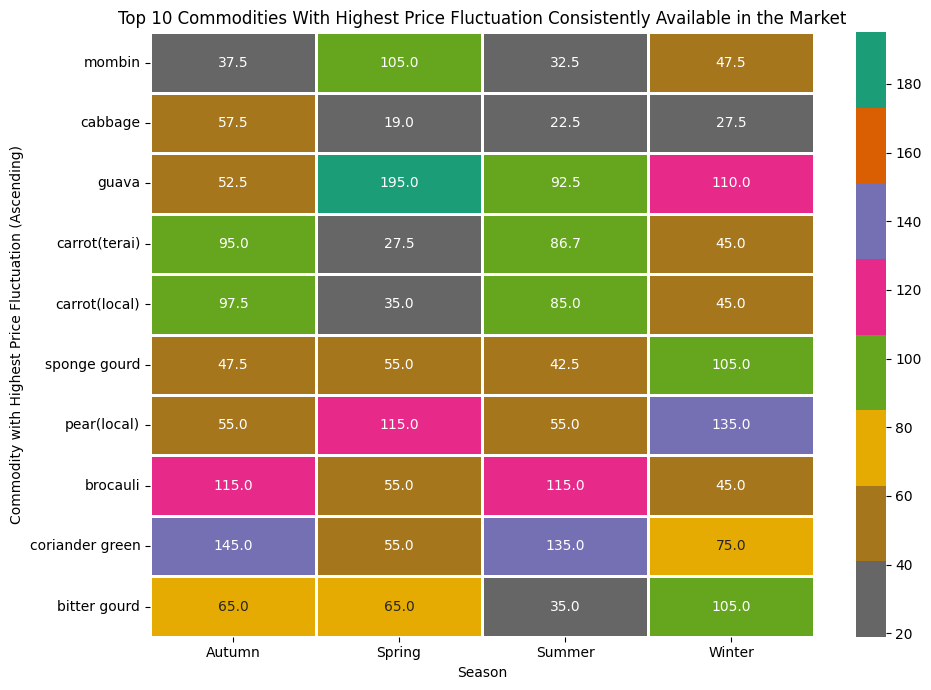

In [57]:
filtered_items_avg_zero_no = items_avg_season[zero_count==0]

filtered_items_avg_zero_no["Coefficient of Variation"] = (filtered_items_avg_zero_no.std(axis = 1)/filtered_items_avg_zero_no.mean(axis = 1))*100

sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = False)
top_10_variations = sorted_items.head(10)


plt.figure(figsize = (10,7))

sns.heatmap(top_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Commodities With Highest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()






1. **Mombin:**
   - Exhibits significant price volatility.
   - In Spring, its price nearly doubles.

2. **Cabbage:**
   - Appears to be a commonly produced and used item.
   - Maintains fairly consistent prices in all seasons.
   - Prices only show an increase in Autumn.

3. **Guava:**
   - Experiences a sharp price increase in Spring.
   - Becomes more affordable in Autumn.

4. **Seasonal Price Comparison:**
   - Generally, most commodities are cheaper in Spring.
   - Prices are slightly higher in Summer.
   - Winter is the most expensive season for these items.

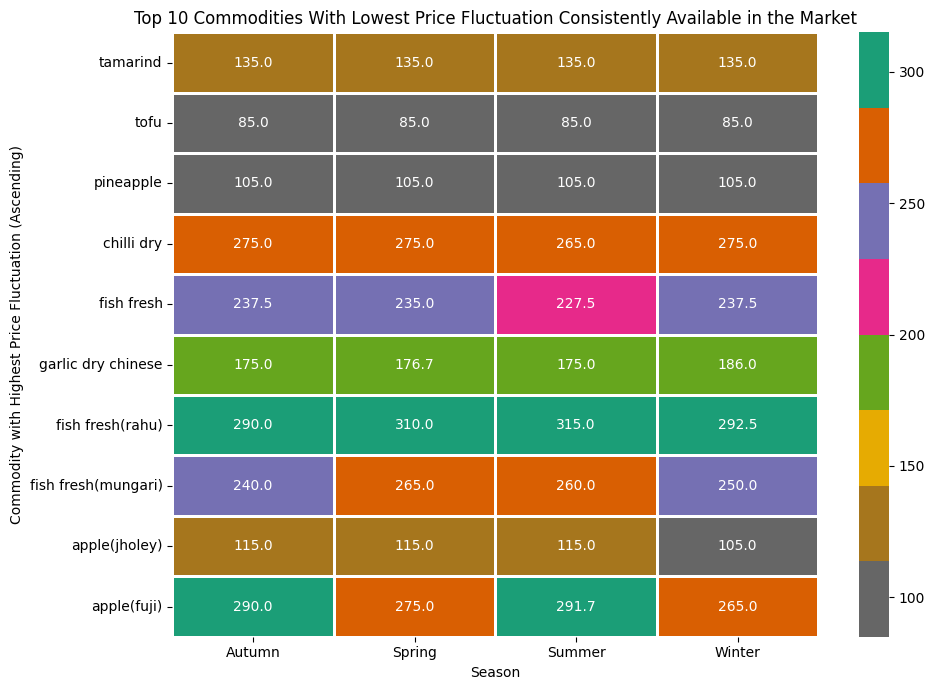

In [58]:

sorted_items = filtered_items_avg_zero_no.sort_values(by = ["Coefficient of Variation"],
                               ascending = True)
less_10_variations = sorted_items.head(10)



plt.figure(figsize = (10,7))

sns.heatmap(less_10_variations.iloc[:,:-1], 
            linewidths = 1,
            cmap='Dark2_r', 
            annot = True,
           fmt = ".1f")
plt.ylabel("Commodity with Highest Price Fluctuation (Ascending)")
plt.xlabel("Season")
plt.title("Top 10 Commodities With Lowest Price Fluctuation Consistently Available in the Market", fontsize = 12)
plt.tight_layout()



1. **Price Consistency:**
   - Products in this category exhibit fairly consistent prices.
   - Prices fluctuate within a narrow range of 10-14 Rs.
   
2. **Adequate Production:**
   - These consistent price trends suggest that production of these products is fairly adequate across all seasons.

## Analyzing the Most Expensive and Least Expensive Product Over the Years and Seasonwise

In [59]:
max_price = data.groupby(["Year", "Commodity"])["Average"].max().unstack(level = 1).fillna(value = 0)
max_price.head()

Commodity,amla,apple(fuji),apple(jholey),arum,asparagus,avocado,bakula,bamboo shoot,banana,barela,...,tomato small(indian),tomato small(local),tomato small(terai),tomato small(tunnel),tree tomato,turnip,turnip a,water melon(dotted),water melon(green),yam
Year,,,,,,,,,,,,,,,,,,,,,
2013,0.0,0.0,145.0,42.5,375.0,0.0,95.0,305.0,75.0,95.0,...,0.0,77.5,0.0,0.0,0.0,57.5,67.5,0.0,85.0,57.5
2014,0.0,0.0,265.0,57.5,650.0,0.0,95.0,165.0,125.0,95.0,...,0.0,67.5,0.0,0.0,0.0,77.5,65.0,0.0,87.5,57.5
2015,0.0,0.0,205.0,47.5,650.0,0.0,85.0,95.0,125.0,95.0,...,0.0,95.0,0.0,0.0,0.0,57.5,125.0,0.0,95.0,125.0
2016,0.0,0.0,155.0,54.0,425.0,0.0,95.0,155.0,425.0,100.0,...,0.0,87.5,0.0,0.0,0.0,0.0,95.0,0.0,85.0,47.5
2017,0.0,0.0,125.0,62.5,475.0,0.0,105.0,145.0,95.0,105.0,...,0.0,97.5,0.0,0.0,0.0,0.0,99.0,0.0,105.0,65.0


In [60]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d} ({p:.2f}'.format(p = pct,v=val)+"%)"
    return my_autopct

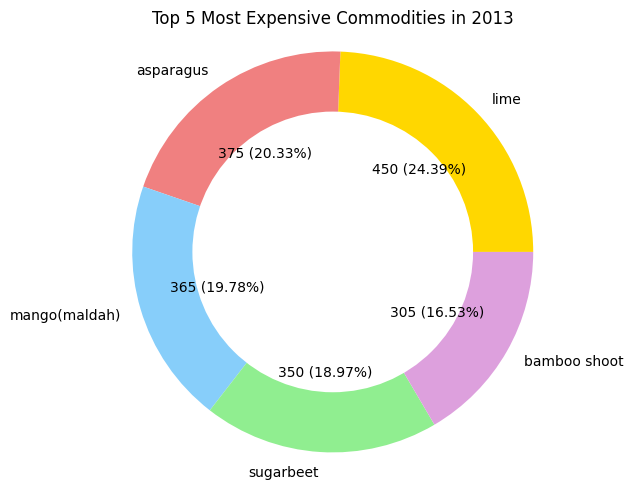

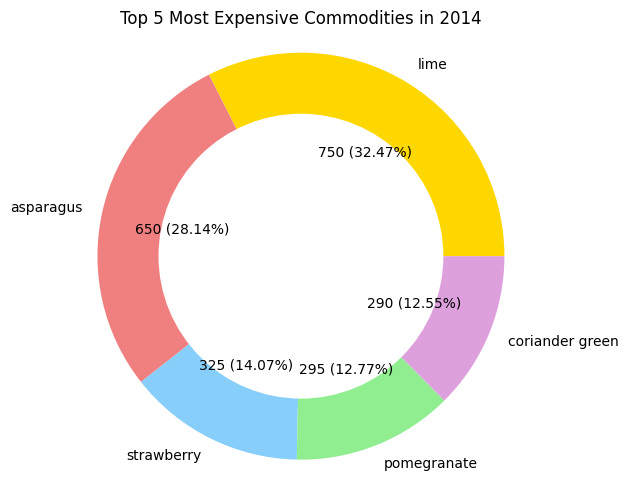

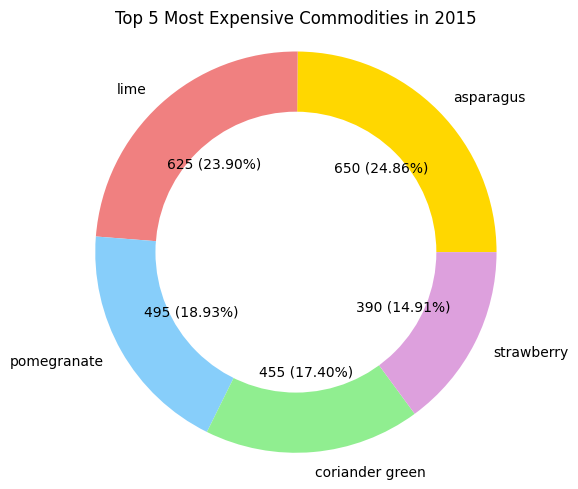

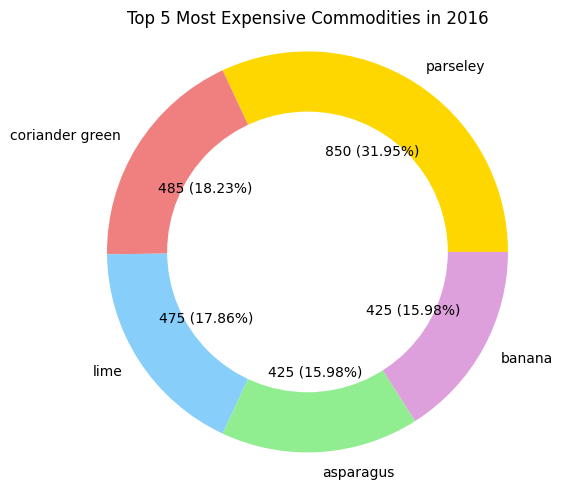

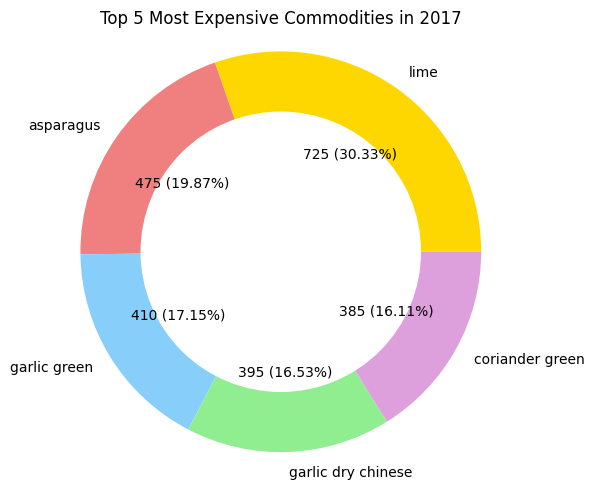

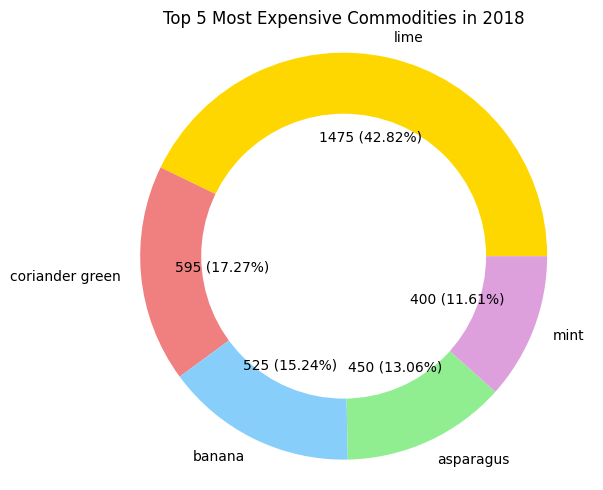

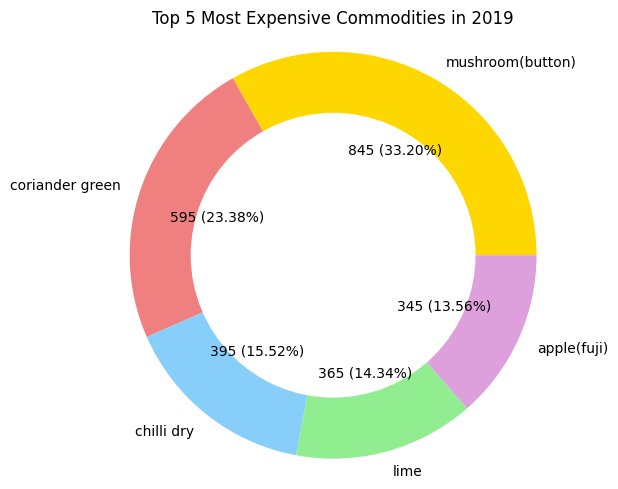

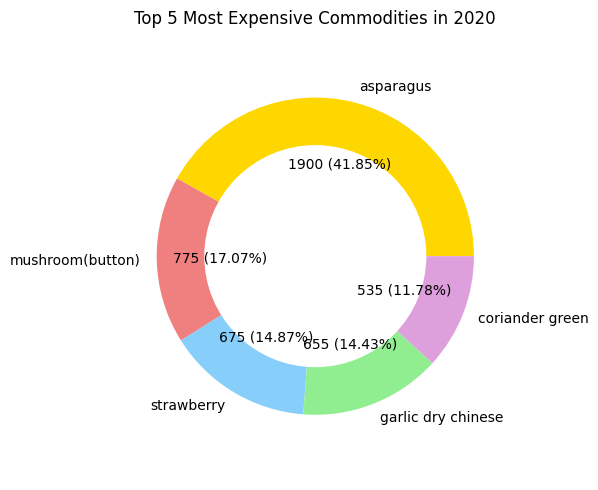

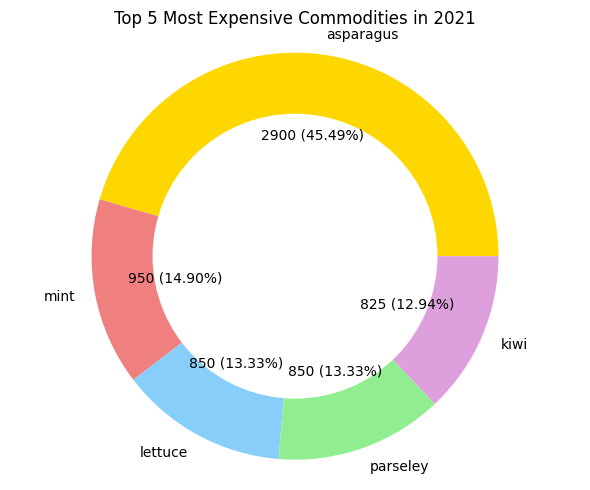

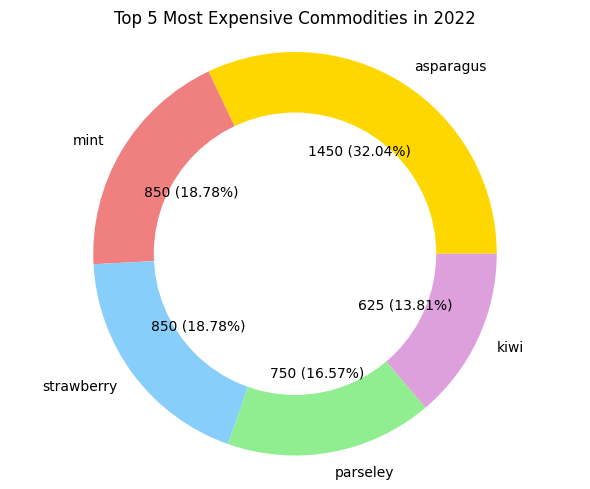

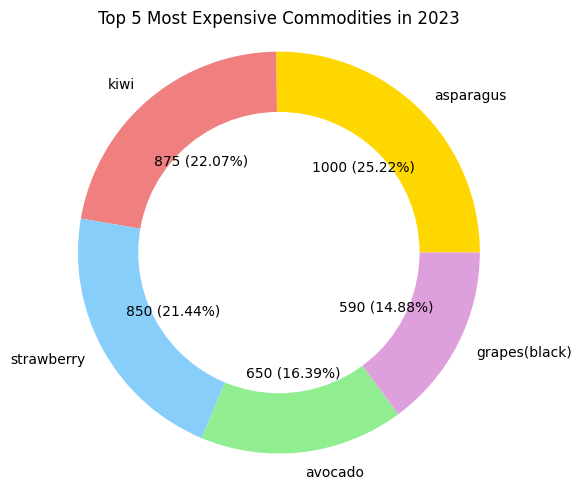

In [61]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for year in max_price.index:
    top5 = max_price.loc[year].nlargest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Most Expensive Commodities in {year}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    
    

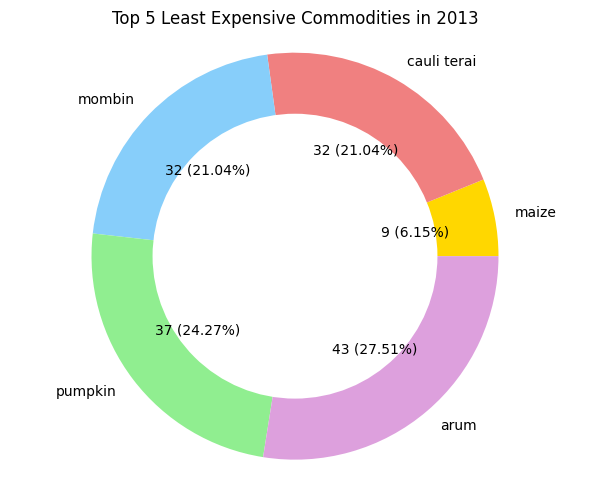

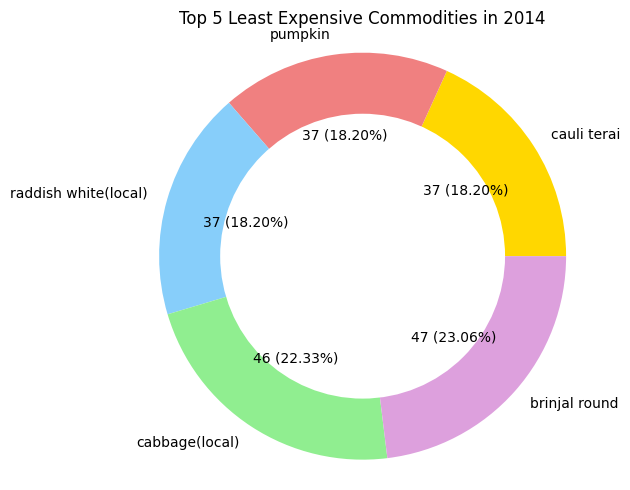

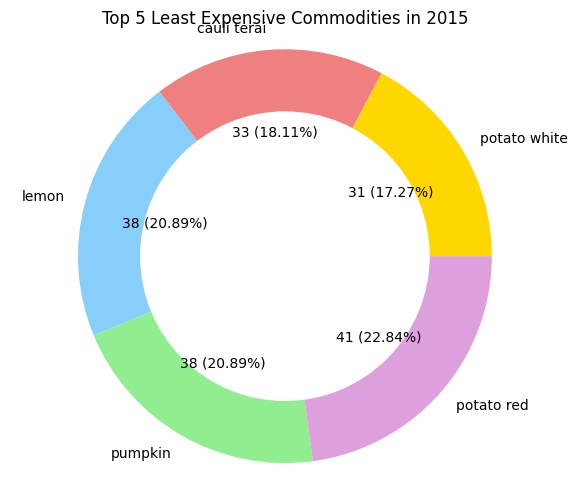

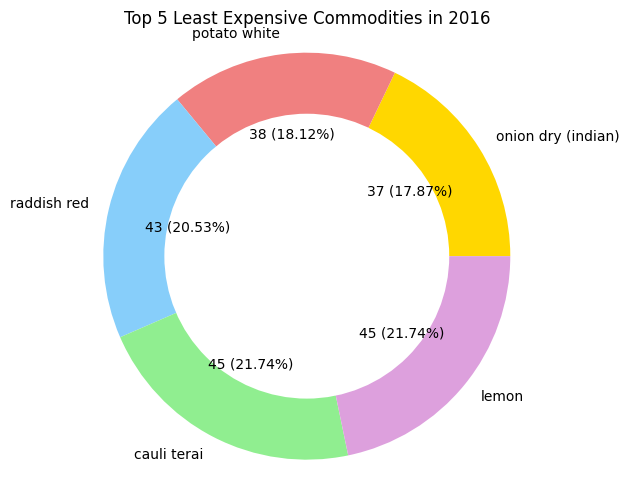

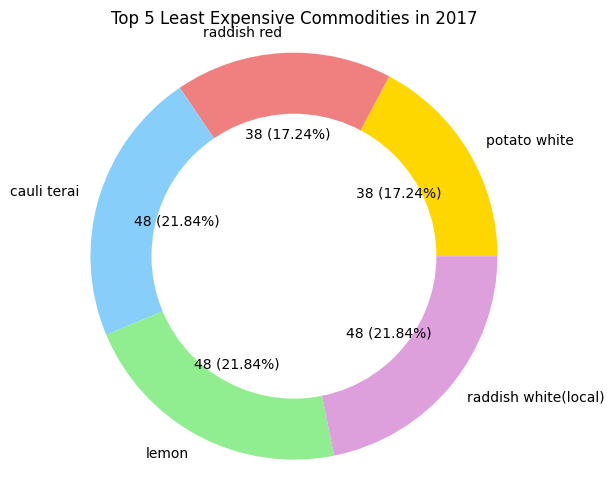

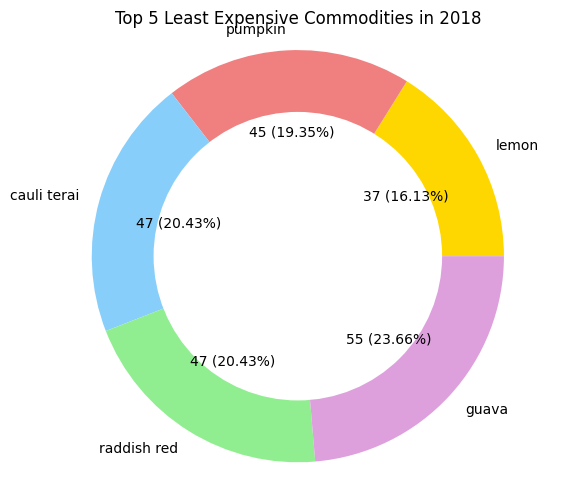

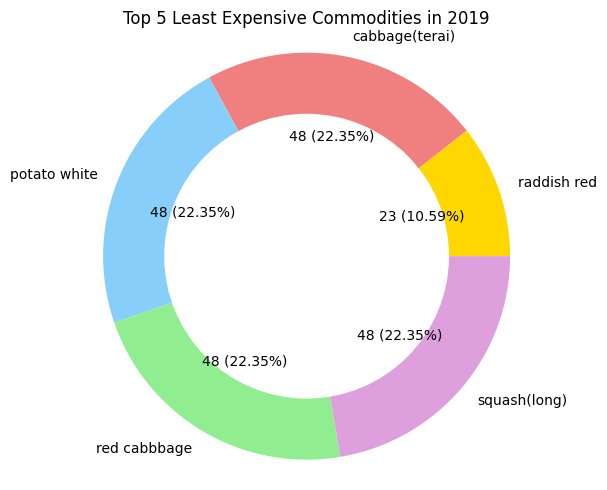

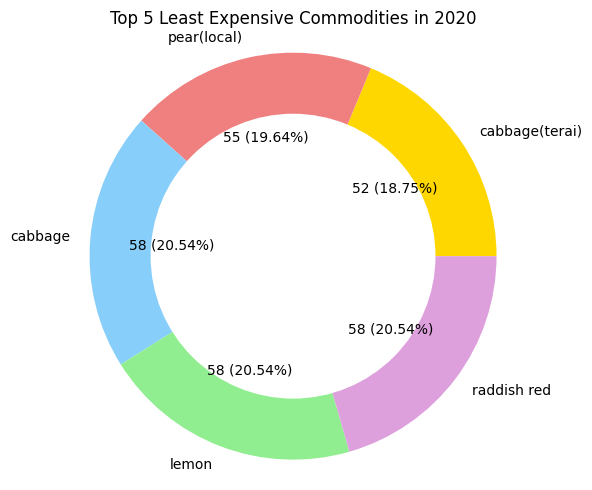

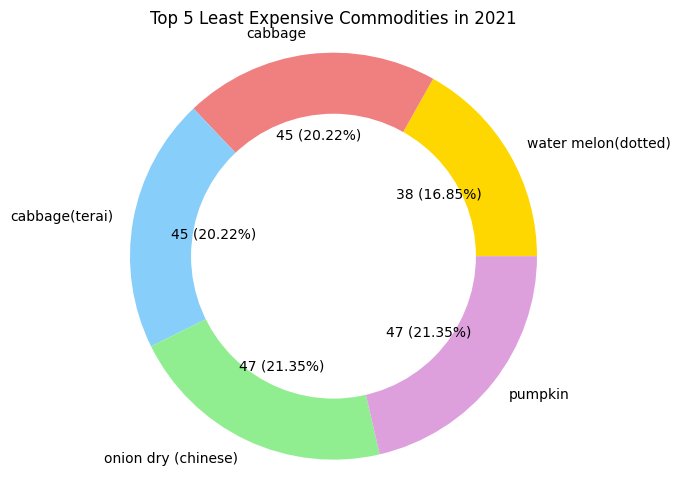

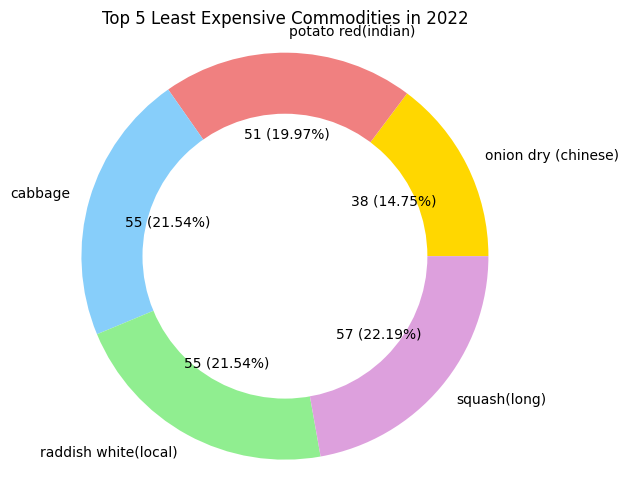

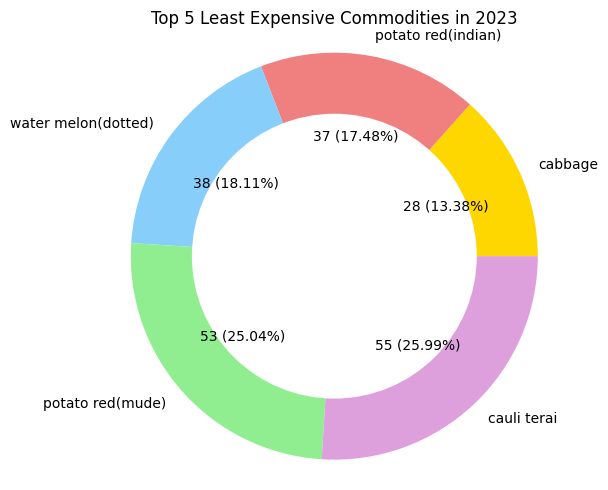

In [62]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for year in max_price.index:
    top5 = max_price.loc[year][max_price.loc[year]>0].nsmallest(5)
    
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Least Expensive Commodities in {year}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()
    

### Seasonwise Most Expensive

In [63]:
max_price = data.groupby(["Season", "Commodity"])["Average"].max().unstack(level = 1).fillna(value = 0)
max_price.head()

Commodity,amla,apple(fuji),apple(jholey),arum,asparagus,avocado,bakula,bamboo shoot,banana,barela,...,tomato small(indian),tomato small(local),tomato small(terai),tomato small(tunnel),tree tomato,turnip,turnip a,water melon(dotted),water melon(green),yam
Season,,,,,,,,,,,,,,,,,,,,,
Autumn,140.0,340.00,290.00,76.67,2900.0,300.00,190.0,135.0,156.67,190.0,...,95.00,117.5,0.00,117.5,0.00,95.00,145.0,85.00,175.0,150.0
Spring,175.0,293.33,290.00,66.67,1450.0,566.67,140.0,160.0,525.00,125.0,...,106.67,97.5,116.67,115.0,173.33,85.00,125.0,38.33,87.5,135.0
Summer,175.0,383.33,293.33,76.67,1150.0,650.00,155.0,305.0,425.00,175.0,...,92.50,92.5,75.00,114.6,0.00,86.67,115.0,52.50,95.0,0.0
Winter,115.0,295.00,270.00,65.00,1900.0,550.00,145.0,165.0,160.00,95.0,...,85.00,82.5,65.00,75.0,145.00,85.00,135.0,0.00,115.0,86.0


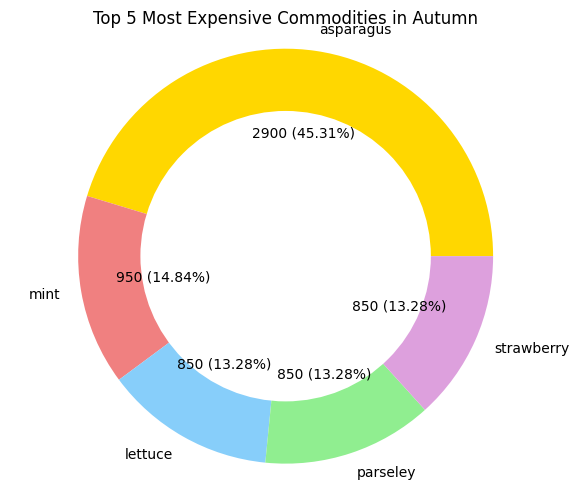

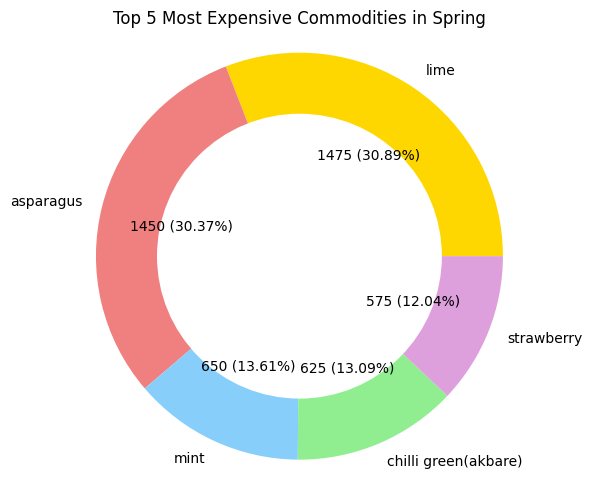

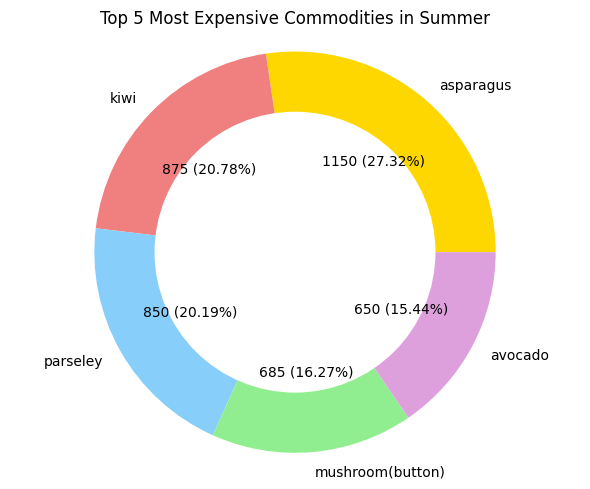

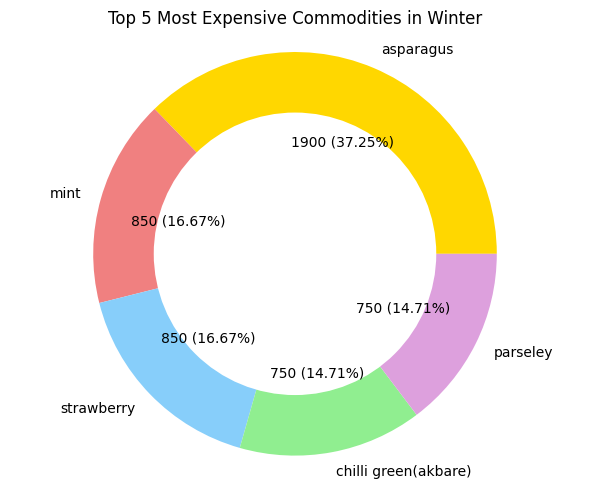

In [64]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for season in max_price.index:
    top5 = max_price.loc[season].nlargest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Most Expensive Commodities in {season}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

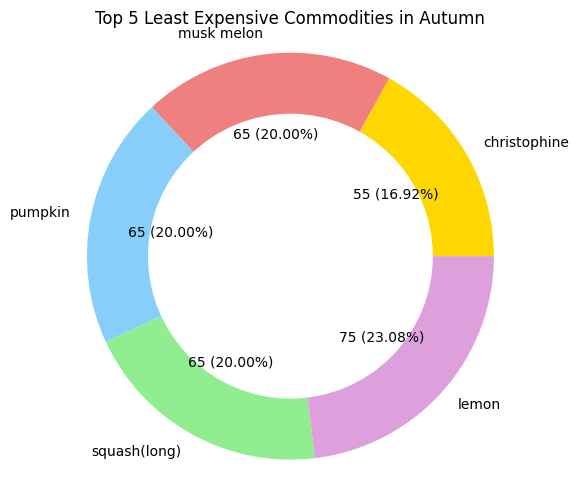

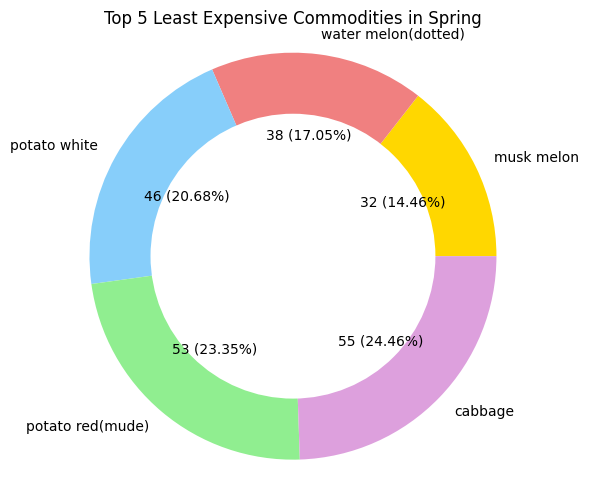

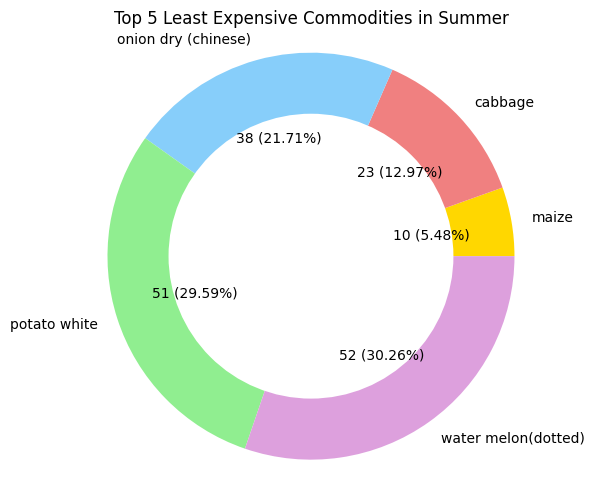

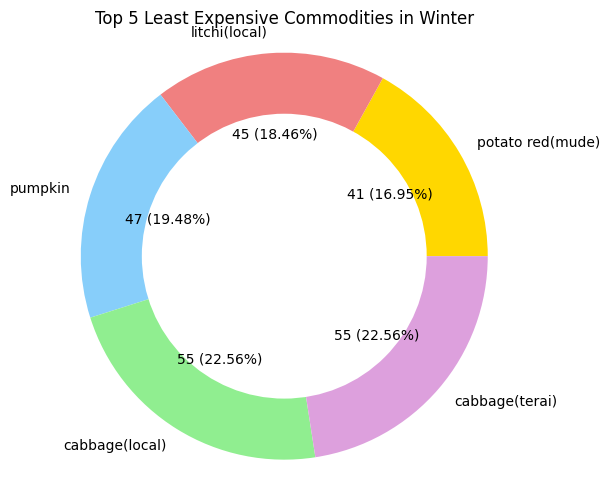

In [65]:
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen', 'plum']
for season in max_price.index:
    top5 = max_price.loc[season][max_price.loc[season]>0].nsmallest(5)
    plt.figure(figsize = (6,5))
    plt.pie(x = top5.values, labels = top5.index, autopct = make_autopct(top5.values),colors = colors)
    plt.gca().add_artist(plt.Circle((0,0), radius = 0.70, fc = "white"))
    plt.title(f'Top 5 Least Expensive Commodities in {season}')
    plt.axis("equal")
    plt.tight_layout()
    plt.show()

## News Based Analysis

https://nepalnews.com/s/issues/farmers-throw-tomatoes-on-the-road


The farmers threw the tomatoes on the road in front of the gate of the Kalimati vegetable and fruit market in Kathmandu on Sunday, saying that the vegetables did not get a fair price and were not sold in the market.

### The Incident Occured in the Month of June

#### Analysis of Price of Tomato (All Kinds) From 2023 April - 2023 August

In [66]:
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day,Season
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday,Summer
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday,Summer
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday,Summer
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday,Summer
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday,Summer


In [67]:
data_selected = pd.DataFrame(columns = data.columns)
selected_months = ["April", "May", "June", "July", "August", "September"]
for i in selected_months:
    select = data[(data["Month"]==i) & (data["Year"]==2023)]
    data_selected = pd.concat([data_selected, select], axis = 0)
data_selected.reset_index(inplace = True, drop = True)

In [68]:
data_selected.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day,Season
0,amla,2023-04-01,KG,110.0,120.0,115.0,April,2023,Saturday,Spring
1,apple(fuji),2023-04-01,KG,250.0,300.0,275.0,April,2023,Saturday,Spring
2,apple(jholey),2023-04-01,KG,200.0,220.0,210.0,April,2023,Saturday,Spring
3,arum,2023-04-01,KG,40.0,50.0,45.0,April,2023,Saturday,Spring
4,asparagus,2023-04-01,KG,400.0,500.0,450.0,April,2023,Saturday,Spring


In [69]:
tomato_rows = data_selected[data_selected["Commodity"].str.contains("tomato", case = False)]
tomato_rows.reset_index(inplace = True, drop = True)

In [70]:
grouped_tomato = tomato_rows.groupby(["Commodity", "Month"])["Average"].median().unstack(level = 0)
grouped_tomato

Commodity,tomato big(indian),tomato big(nepali),tomato small(indian),tomato small(local),tomato small(terai),tomato small(tunnel)
Month,,,,,,
April,55.000,55.00,35.0,22.33,35.000,35.000
August,105.000,142.50,NaN,65.00,NaN,84.000
July,NaN,86.00,NaN,30.75,NaN,45.400
June,45.835,38.25,NaN,13.00,NaN,13.235
May,56.670,55.00,38.0,37.50,48.165,47.500
September,45.000,65.00,47.5,50.00,NaN,64.500


**Here, the presence of "NaN" indicates that during those specific months, this type of tomatoes did not arrive at the Kalimati Market.**

In [71]:
grouped_tomato.fillna(value = 0, inplace = True, axis = 0)

In [72]:
def make_autopct(values, fontsize = 14):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_autopct

In [73]:
fonts = [f.name for f in matplotlib.font_manager.fontManager.ttflist]
select_font = fonts[np.random.randint(0, len(fonts))]

/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 80 (P) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 114 (r) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 105 (i) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 99 (c) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 101 (e) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 86 (V) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910269.py:19: UserWarning: Glyph 97 (a) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/47910

<Figure size 2000x2000 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 80 (P) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 114 (r) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 105 (i) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 99 (c) missing from current font.
  fig.canvas.print_figure(bytes_io, 

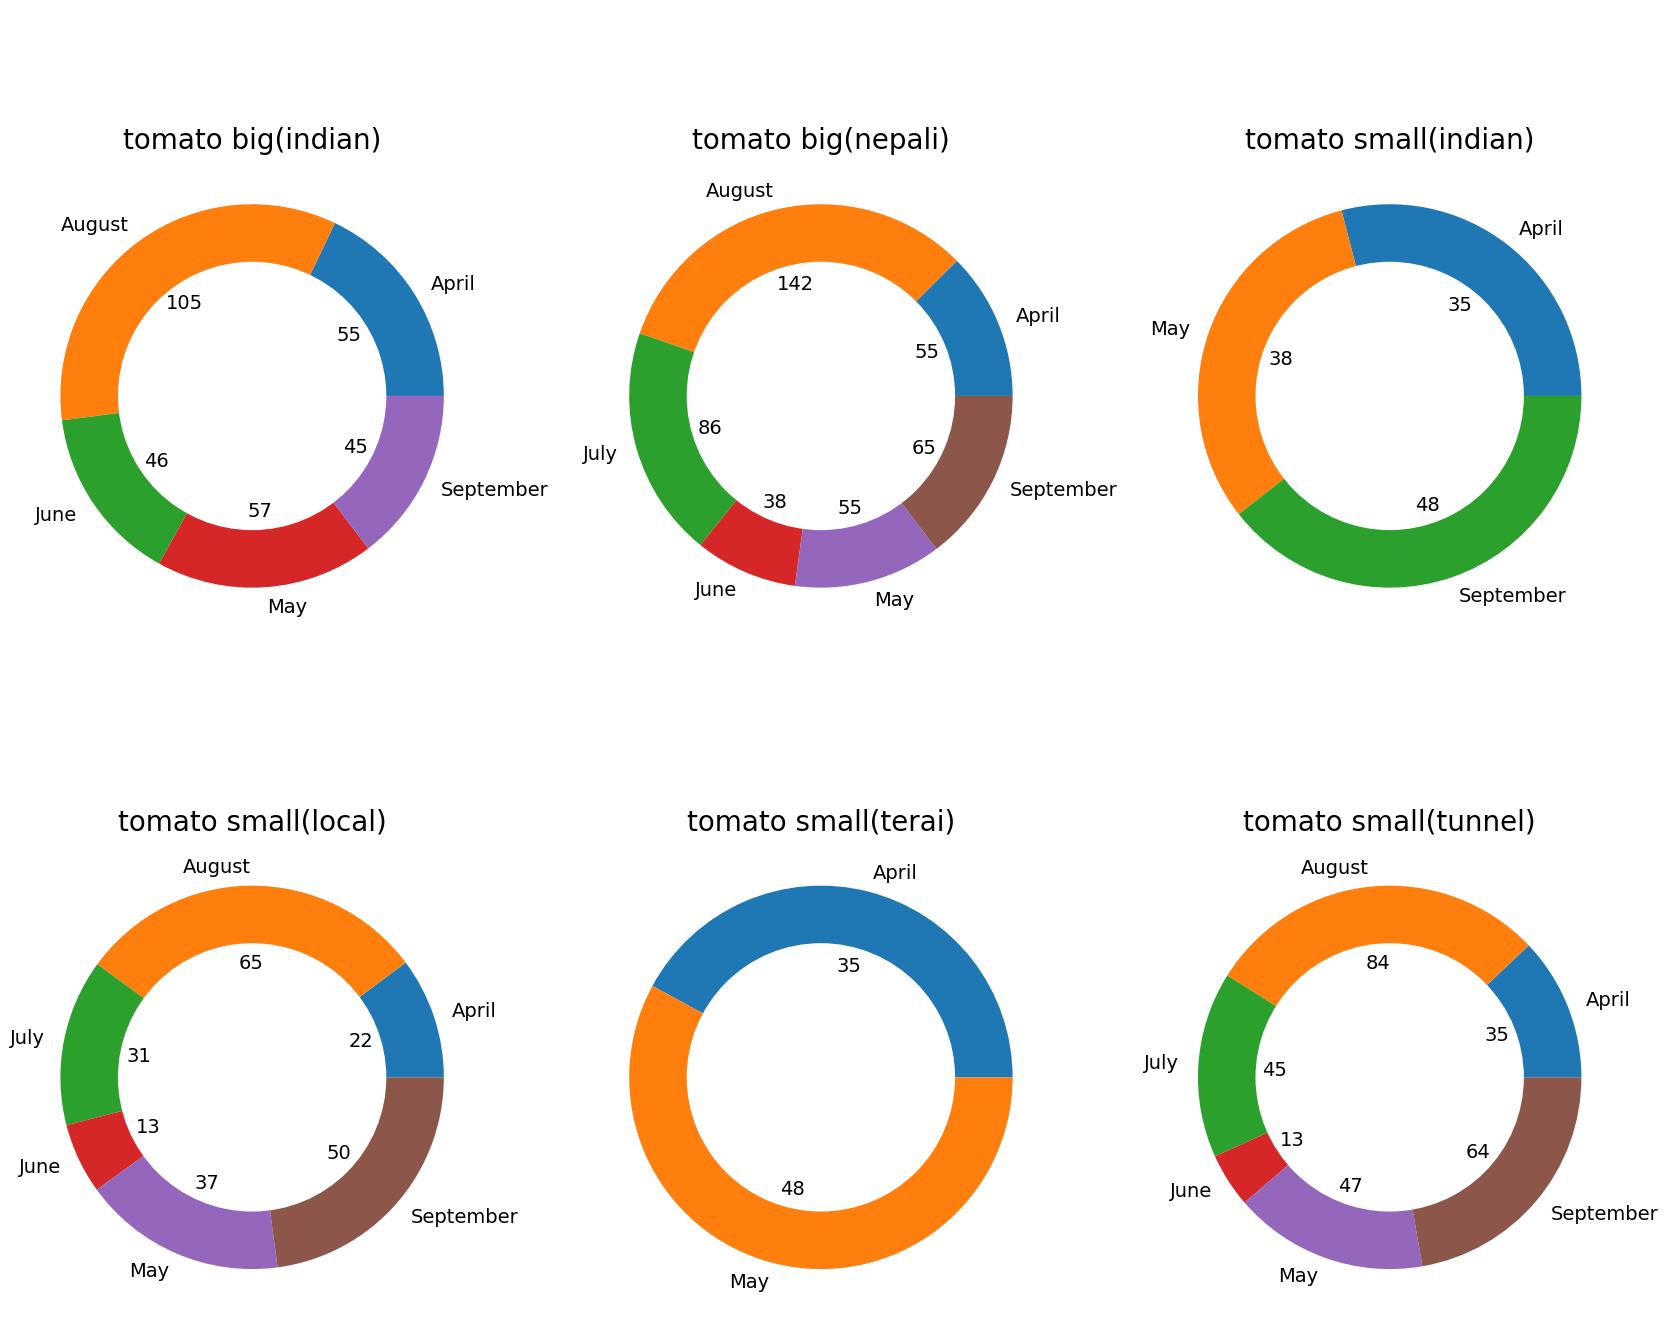

In [74]:
plt.figure(figsize = (20,20))
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (17,15))
ax = ax.ravel()
for i in range(len(ax)):
    values = grouped_tomato[grouped_tomato.columns[i]].values
    labels = grouped_tomato.index
    filtered_values = [x for x, label in zip(values, labels) if x!=0]
    filtered_labels = [label for x, label in zip(values, labels) if x!=0]
    wedges, text, autotexts = ax[i].pie(x = filtered_values, 
              labels = filtered_labels, autopct = make_autopct(filtered_values, fontsize = 30))
    for text, autotext in zip(text, autotexts):
        text.set_fontsize(14)
        autotext.set_fontsize(14)
    circle = plt.Circle((0,0), radius = 0.70, fc = "white")
    ax[i].add_patch(circle)
    ax[i].set_title(grouped_tomato.columns[i], fontsize = 20)
    
plt.suptitle("Price Variation and the Incident", fontsize = 30, color = "red", fontname = select_font)
plt.tight_layout()
plt.show()

**From the Plot Analysis:**

1. Prices for all tomato varieties hit their lowest point in June, coinciding with the incident.
   
**Tomato Price Declines in June:**

2. Among the tomatoes available in June, the following declines were observed:
    - Tomato Big Indian: 19.29% drop
    - Tomato Big Nepali: 30.90% drop
    - Tomato Small (Local): 64.86% drop
    - Tomato Small (Tunnel): 72.91% drop

3. The most significant impact was on Nepalese Tomato products, especially Tomato Small (Tunnel), indicating potential local production.

**Disappearance of Some Tomato Varieties:**

4. Tomato Small (Indian) and Tomato Small (Terai) disappeared from the market after May and Tomato Small (Indian) reappeared in September.

5. This suggests two possibilities: either their stock levels surged, leading to halted imports from India for Tomato Small (Indian), or these products faced reduced consumer demand.

**Divergence in Tomato Prices After July:**

6. Tomato Big (Nepali) and Tomato Big (Indian) had nearly identical prices until July.

7. Small Tomatoes produced in Nepal, previously priced similarly to Small Tomatoes (Indian), experienced a sudden price surge in July and August.

8. This surge coincided with the absence of Small Tomatoes (Indian) from the market.

9. Before this surge, in June, the prices of all tomatoes produced in Nepal had plummeted abruptly.

These points raise questions about the factors influencing tomato prices and market dynamics during this period. Further investigation is warranted to understand the underlying causes of these trends.

## Weekwise Picture Before the June Incident

In [75]:
p = inflect.engine()
data["Week_of_Month"] = data["Date"].dt.day.apply(lambda x: p.ordinal((x-1)//7+1))
data.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day,Season,Week_of_Month
0,tomato big(nepali),2013-06-16,Kg,35.0,40.0,37.5,June,2013,Sunday,Summer,3rd
1,tomato small(local),2013-06-16,Kg,26.0,32.0,29.0,June,2013,Sunday,Summer,3rd
2,potato red,2013-06-16,Kg,20.0,21.0,20.5,June,2013,Sunday,Summer,3rd
3,potato white,2013-06-16,Kg,15.0,16.0,15.5,June,2013,Sunday,Summer,3rd
4,onion dry (indian),2013-06-16,Kg,28.0,30.0,29.0,June,2013,Sunday,Summer,3rd


In [76]:
data_select = data[(data["Month"]=="May")&(data["Year"]==2023)]
data_select = data_select[data_select["Commodity"].str.contains("tomato", case = False)]
data_select.reset_index(drop = True, inplace = True)
data_select.head()

,Commodity,Date,Unit,Minimum,Maximum,Average,Month,Year,Day,Season,Week_of_Month
0,tomato big(indian),2023-05-01,KG,40.0,50.0,45.0,May,2023,Monday,Spring,1st
1,tomato big(nepali),2023-05-01,KG,40.0,50.0,45.0,May,2023,Monday,Spring,1st
2,tomato small(indian),2023-05-01,KG,35.0,40.0,37.5,May,2023,Monday,Spring,1st
3,tomato small(local),2023-05-01,KG,35.0,40.0,37.5,May,2023,Monday,Spring,1st
4,tomato small(terai),2023-05-01,KG,40.0,45.0,42.5,May,2023,Monday,Spring,1st


In [77]:
daywise_grp = data_select.groupby(["Commodity", "Week_of_Month"])["Average"].mean().unstack(level = 0)
daywise_grp.fillna(0, inplace = True)
daywise_grp

Commodity,tomato big(indian),tomato big(nepali),tomato small(indian),tomato small(local),tomato small(terai),tomato small(tunnel)
Week_of_Month,,,,,,
1st,54.048571,53.571429,46.165714,46.904286,52.618571,0.000000
2nd,60.001429,55.238571,44.357143,50.571429,57.618571,52.675000
3rd,64.048571,55.000000,38.214286,32.774286,45.071429,49.857143
4th,54.287143,46.428571,32.111667,30.232857,34.785714,44.428571
5th,52.223333,38.750000,0.000000,16.866667,0.000000,34.000000


/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 86 (V) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 97 (a) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 114 (r) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 105 (i) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 116 (t) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 111 (o) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_20/846831792.py:19: UserWarning: Glyph 110 (n) missing from current font.
  plt.tight_layout()
/tmp/ipykern

<Figure size 2000x2000 with 0 Axes>

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 86 (V) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 97 (a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 114 (r) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 105 (i) missing from current font.
  fig.canvas.print_figure(bytes_io, 

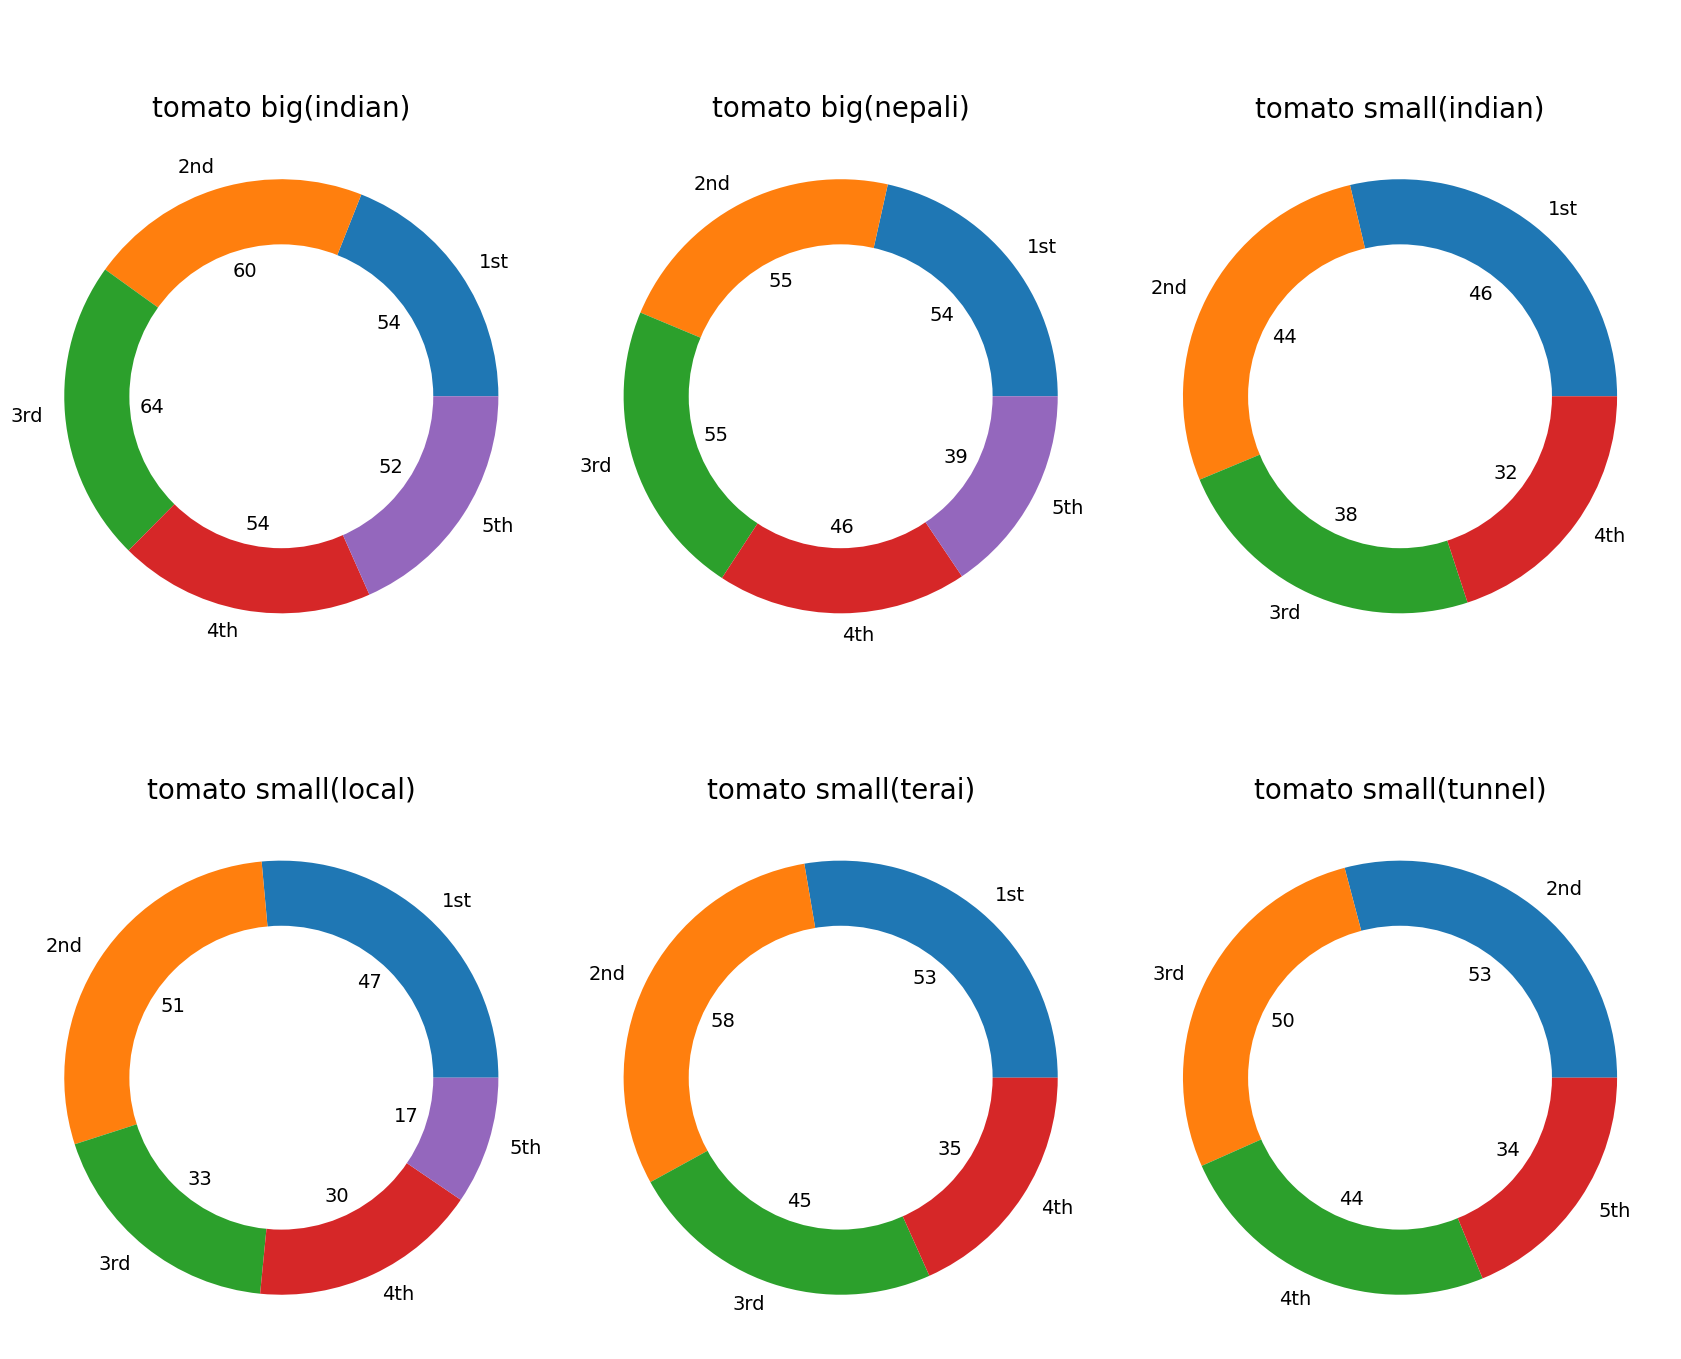

In [78]:
plt.figure(figsize = (20,20))
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (17,15))
ax = ax.ravel()
for i in range(len(ax)):
    values = daywise_grp[daywise_grp.columns[i]].values
    labels = daywise_grp.index
    filtered_values = [x for x, label in zip(values, labels) if x!=0]
    filtered_labels = [label for x, label in zip(values, labels) if x!=0]
    wedges, text, autotexts = ax[i].pie(x = filtered_values, 
              labels = filtered_labels, autopct = make_autopct(filtered_values, fontsize = 30))
    for text, autotext in zip(text, autotexts):
        text.set_fontsize(14)
        autotext.set_fontsize(14)
    circle = plt.Circle((0,0), radius = 0.70, fc = "white")
    ax[i].add_patch(circle)
    ax[i].set_title(grouped_tomato.columns[i], fontsize = 20)
    
plt.suptitle("Variation in Price Based on Week Number in May", fontsize = 30, color = "red", fontname = select_font)
plt.tight_layout()
plt.show()

**Sale of Small Tomatoes:**

1. Small tomatoes from Terai and India were not available for sale until the fifth week of May.

2. In contrast, all other tomato varieties were sold throughout the entire month of May.

**Price Trend of Tomato Small (Indian) and Tomato Small (Tunnel):**

3. Throughout the month, the prices of Tomato Small (Indian) and Tomato Small (Tunnel) exhibited a continuous and gradual decrease.

4. There were no price increases during this period, and the prices remained decreased further with every progression.

# Kalimati Market Data Analysis Portfolio

## Executive Summary

This portfolio report provides an analysis of the price fluctuations of fruits and vegetables in the Kalimati market. It delves into the classification of items based on their consistency in availability, seasonal and year-wise price trends, and an investigation into an incident involving tomatoes being thrown on the streets due to plummeting prices.

## Analysis Sections

### 1. Price Fluctuation Analysis

#### 1.1 Fruits and Vegetables with Highest Price Fluctuation
   - A detailed examination of items exhibiting the most significant price fluctuations.
   - Insights into the factors contributing to these fluctuations.

#### 1.2 Fruits and Vegetables with Lowest Price Fluctuation
   - An exploration of items characterized by stable prices.
   - Factors that contribute to the predictability of these prices.

### 2. Season-Based Price Analysis

#### 2.1 Highest Price Items by Season
   - A seasonal breakdown of the items that command the highest prices in the Kalimati market.
   - Implications of these seasonal trends for consumers and producers.

#### 2.2 Year-Wise Seasonal Trends
   - Examination of how price trends have evolved year by year.
   - Identification of patterns, anomalies, and their potential causes.

### 3. Analysis of Tomato Incident

#### 3.1 Incident Overview
   - Detailed information on the incident where tomatoes were discarded on the streets.
   - Timing and circumstances surrounding the event.

#### 3.2 Potential Causes
   - Investigation into why smaller tomatoes were no longer supplied to the market.
   - Possible factors that led to the incident.

## Conclusions

This report sheds light on the dynamic nature of the Kalimati market, highlighting significant price fluctuations among various fruits and vegetables. It demonstrates the impact of seasonality on prices and delves into a specific incident involving tomatoes. Although the exact reasons for the incident remain unclear, this analysis provides valuable insights into the challenges faced by farmers and the market.

## Recommendations

The findings in this report suggest that a more detailed and continuous monitoring of market dynamics could help both producers and consumers adapt to price fluctuations more effectively. It may also be beneficial to investigate the incident involving tomatoes further to determine if there are opportunities to improve the market's stability.

## Acknowledgments

We acknowledge the data and information sources that have contributed to this report.